# Credit Card Customer Segmentation Using Unsupervised Learning

## Final Project - Unsupervised Learning Analysis

**Owner:** Mina Shoukrala
  
**GitHub Repository:** https://github.com/minashoukrala/ML-Unstructered-Data-Final-Project  
**Dataset Source:** https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data


---

## Table of Contents

1. [Problem Description](#problem-description)
2. [Data Collection and Provenance](#data-collection)
3. [Exploratory Data Analysis (EDA)](#eda)
   - 3.1 [Data Loading and Initial Inspection](#data-loading)
   - 3.2 [Data Types and Basic Statistics](#data-types)
   - 3.3 [Missing Values Analysis](#missing-values)
   - 3.4 [Feature Distribution Analysis](#feature-distribution)
   - 3.5 [Correlation Analysis](#correlation)
   - 3.6 [Outlier Detection](#outliers)
   - 3.7 [Data Transformation Decisions](#transformation)
4. [Unsupervised Learning Models](#models)
   - 4.1 [Data Preprocessing](#preprocessing)
   - 4.2 [K-Means Clustering](#kmeans)
   - 4.3 [DBSCAN Clustering](#dbscan)
   - 4.4 [Hierarchical Clustering](#hierarchical)
   - 4.5 [Model Comparison](#comparison)
5. [Results and Discussion](#results)
6. [Conclusions](#conclusions)

---


## 1. Problem Description

### Unsupervised Learning Problem: Customer Segmentation

In this project, we aim to identify distinct customer segments within a credit card customer dataset using **unsupervised learning techniques**. Customer segmentation is a critical business problem that helps financial institutions:

- **Understand customer behavior patterns**: Different customers use credit cards differently - some make frequent small purchases, others make large one-time purchases, and some rely heavily on cash advances.

- **Personalize marketing strategies**: By identifying customer segments, banks can tailor their marketing campaigns, credit limit offers, and product recommendations to specific customer groups.

- **Risk management**: Understanding customer segments helps in assessing credit risk and developing appropriate risk management strategies.

- **Resource allocation**: Banks can optimize their resources by focusing on high-value segments or identifying customers who may need additional support.

### Why Unsupervised Learning?

1. We don't have predefined labels or categories for customers
2. We want to discover hidden patterns and natural groupings in the data
3. The number of segments and their characteristics are unknown beforehand

### Approach

We will employ multiple clustering algorithms to identify customer segments:

- **K-Means Clustering**: A centroid-based algorithm that partitions customers into k clusters
- **DBSCAN**: A density-based algorithm that can identify clusters of varying shapes and detect outliers
- **Hierarchical Clustering**: An agglomerative approach that creates a tree of clusters

By comparing these different approaches, we can gain insights into which segmentation strategy best captures the underlying customer behavior patterns.


## 2. Data Collection and Provenance 

### Data Source

The dataset used in this project is a credit card customer dataset containing behavioral and financial information about credit card customers. The dataset includes:

- **Source**: Kaggle Dataset - Credit Card Customer Data
- **Dataset URL**: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data





## 3. Exploratory Data Analysis (EDA)

Let's begin by loading the data and performing a comprehensive exploratory analysis.


### 3.1 Data Loading and Initial Inspection {#data-loading}


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)


In [2]:
df = pd.read_csv('CC GENERAL.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()


Dataset Shape: (8950, 18)

First few rows:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Good! So we have 8950 customers and 18 features total. I can see CUST_ID is an object type (probably strings), and the rest are mostly floats with a few integers. The data looks pretty clean at first glance, but we'll need to check for missing values next.


In [3]:
print("Column Information:")
print(df.info())
print("\nColumn Names:")
print(df.columns.tolist())


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null  

### 3.2 Data Types and Basic Statistics


Interesting - we have 8950 unique customer IDs which matches the total rows, so no duplicates there. Most columns are float64 which makes sense for financial data. The CUST_ID is an object type which we'll exclude from our analysis since it's just an identifier.


In [4]:
print("Descriptive Statistics:")
df.describe()


Descriptive Statistics:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
print("Data Types:")
print(df.dtypes)
print("\nUnique values in CUST_ID:", df['CUST_ID'].nunique())
print("Total rows:", len(df))


Data Types:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Unique values in CUST_ID: 8950
Total rows: 8950


### 3.3 Missing Values Analysis 


Missing Values Found:
              Column  Missing Count  Missing Percentage
15  MINIMUM_PAYMENTS            313            3.497207
13      CREDIT_LIMIT              1            0.011173


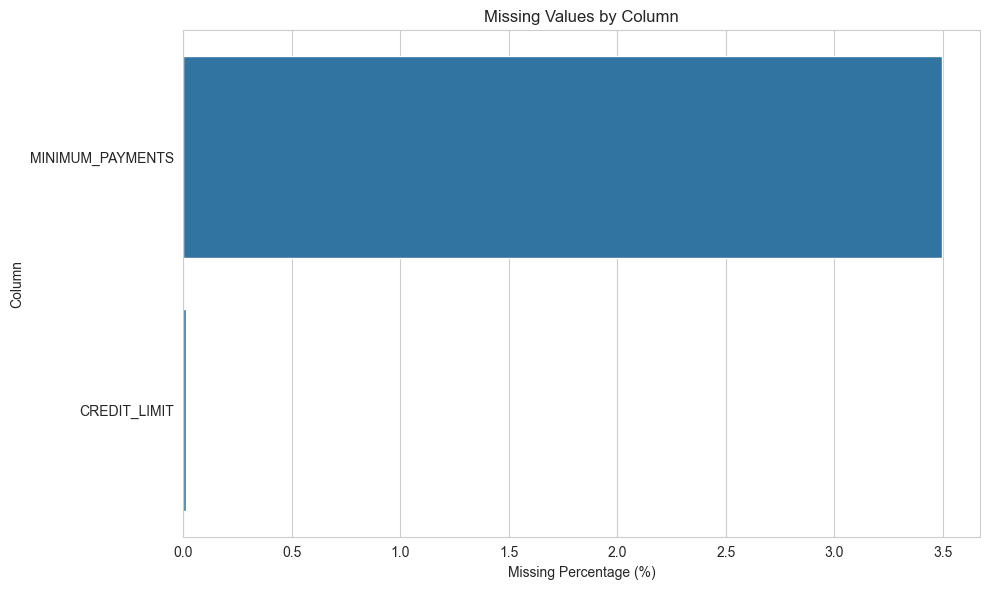

In [6]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Missing Values Found:")
    print(missing_df)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing_df, x='Missing Percentage', y='Column')
    plt.title('Missing Values by Column')
    plt.xlabel('Missing Percentage (%)')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset.")


Okay so we found some missing values - mostly in MINIMUM_PAYMENTS (about 3.5% missing) and just 1 missing in CREDIT_LIMIT. That's not too bad actually. I'll probably use median imputation for these since it's robust to outliers. The visualization shows it pretty clearly - MINIMUM_PAYMENTS is the main concern here.


In [7]:
print("\nRows with missing values:")
print(df.isnull().sum().sum(), "total missing values")

if df.isnull().sum().sum() > 0:
    cols_with_missing = df.columns[df.isnull().any()].tolist()
    print(f"\nColumns with missing values: {cols_with_missing}")
    
    print("\nSample rows with missing values:")
    print(df[df.isnull().any(axis=1)][cols_with_missing].head())



Rows with missing values:
314 total missing values

Columns with missing values: ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

Sample rows with missing values:
    CREDIT_LIMIT  MINIMUM_PAYMENTS
3         7500.0               NaN
45        2400.0               NaN
47        4200.0               NaN
54        1000.0               NaN
55        6000.0               NaN


### 3.4 Feature Distribution Analysis

Now let's examine the distribution of each feature to understand the data better. We'll use histograms, box plots, and other visualizations as appropriate.


In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'CUST_ID' in numeric_cols:
    numeric_cols.remove('CUST_ID')

print(f"Numeric columns for analysis: {len(numeric_cols)}")
print(numeric_cols)


Numeric columns for analysis: 17
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


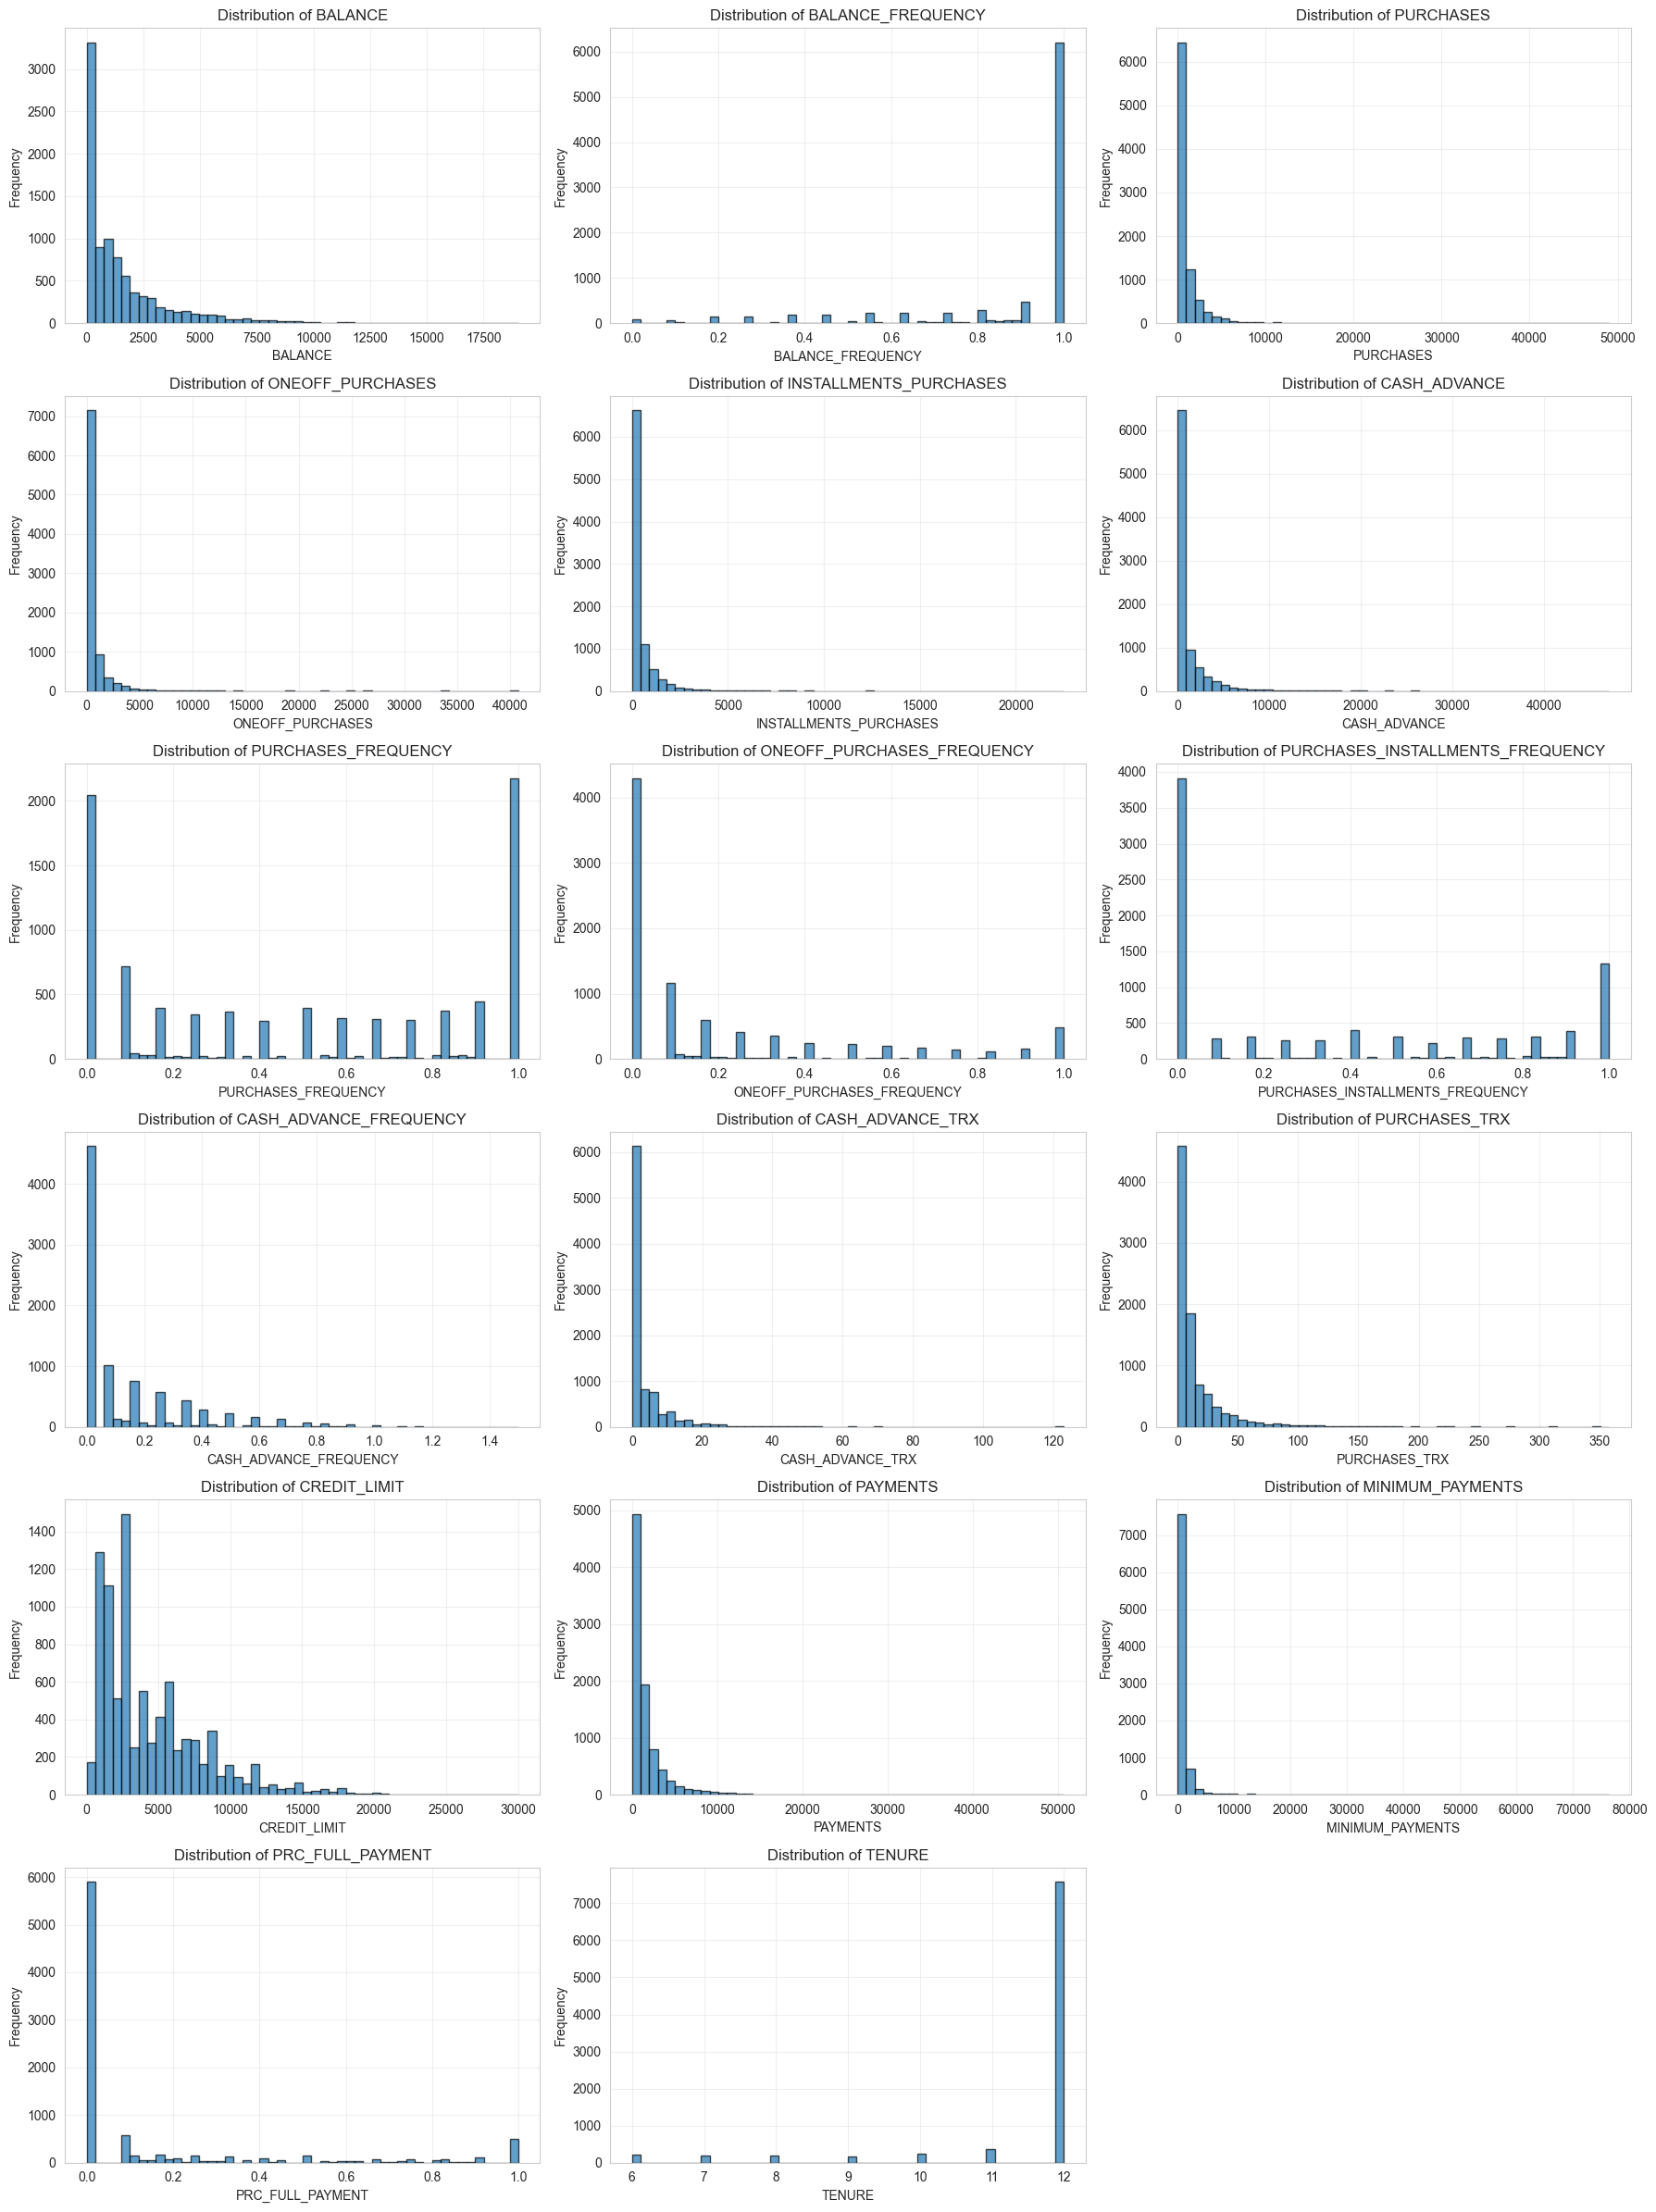

In [9]:
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


Looking at these histograms, I can see most features are heavily right-skewed. Things like PURCHASES, CASH_ADVANCE, and CREDIT_LIMIT have long tails - lots of customers with low values and a few with really high ones. This is pretty typical for financial data. The frequency features (like PURCHASES_FREQUENCY) look more normally distributed which makes sense since they're bounded between 0 and 1.


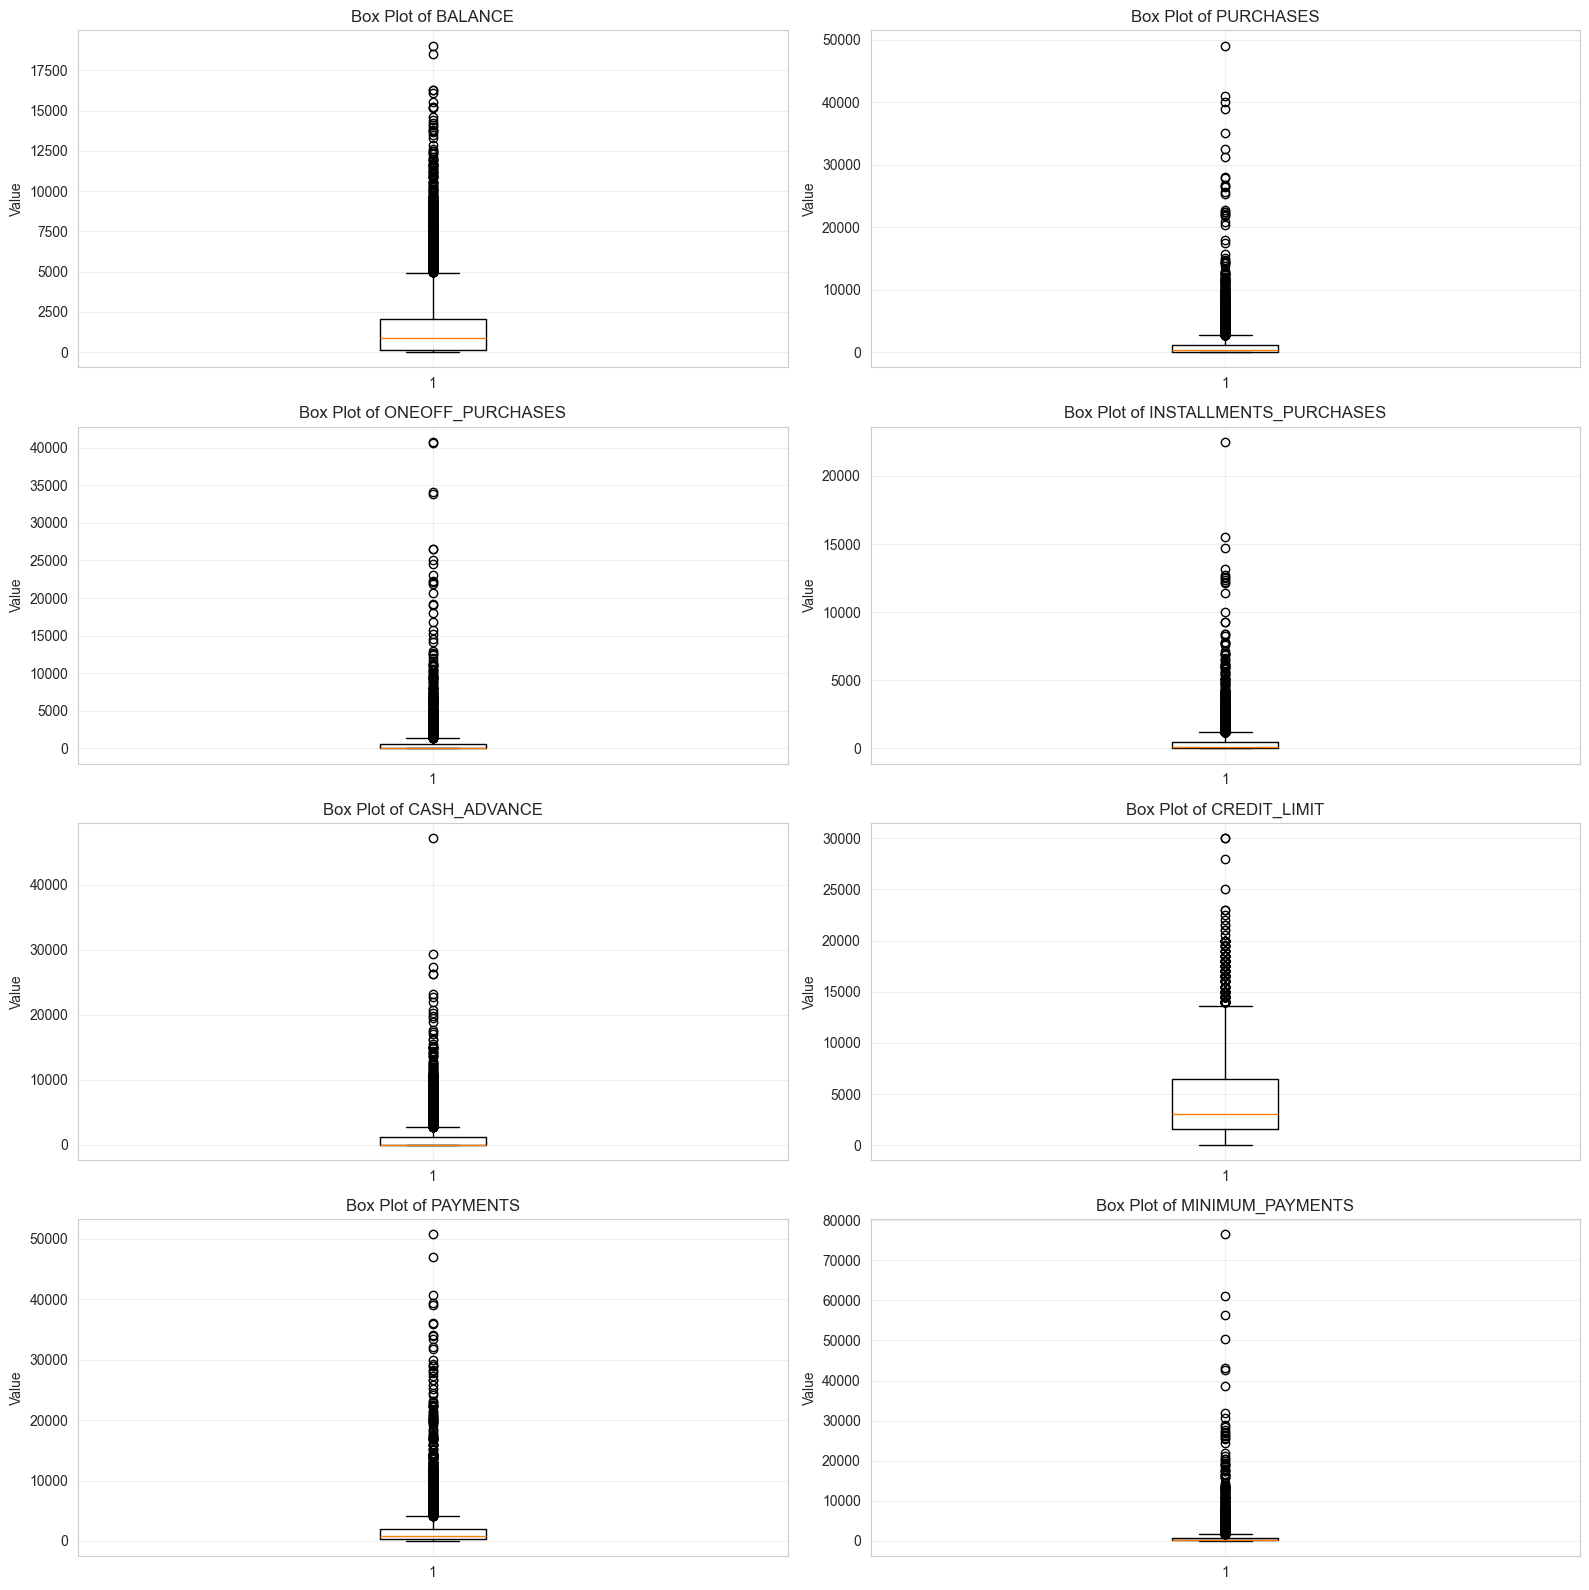

In [10]:
key_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
                'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

n_cols = 2
n_rows = (len(key_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten()

for idx, col in enumerate(key_features):
    if col in df.columns:
        data = df[col].dropna()
        axes[idx].boxplot(data, vert=True)
        axes[idx].set_title(f'Box Plot of {col}')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(True, alpha=0.3)

for idx in range(len(key_features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


Wow, look at those box plots - there are definitely outliers! Especially in PURCHASES and CASH_ADVANCE, you can see some customers with values way above the median. The max for PURCHASES is almost 50k which is way higher than the 75th percentile of ~1100. Same thing with CASH_ADVANCE. These outliers might actually be important for segmentation though - they could represent high-value customers or customers with unusual spending patterns.


In [11]:
print("Statistical Summary of Key Features:")
summary_stats = df[key_features].describe()
print(summary_stats)


Statistical Summary of Key Features:
            BALANCE     PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
count   8950.000000   8950.000000       8950.000000             8950.000000   
mean    1564.474828   1003.204834        592.437371              411.067645   
std     2081.531879   2136.634782       1659.887917              904.338115   
min        0.000000      0.000000          0.000000                0.000000   
25%      128.281915     39.635000          0.000000                0.000000   
50%      873.385231    361.280000         38.000000               89.000000   
75%     2054.140036   1110.130000        577.405000              468.637500   
max    19043.138560  49039.570000      40761.250000            22500.000000   

       CASH_ADVANCE  CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  
count   8950.000000   8949.000000   8950.000000       8637.000000  
mean     978.871112   4494.449450   1733.143852        864.206542  
std     2097.163877   3638.815725   2895.063757

### 3.5 Correlation Analysis

Let's examine the relationships between different features to understand which factors are correlated.


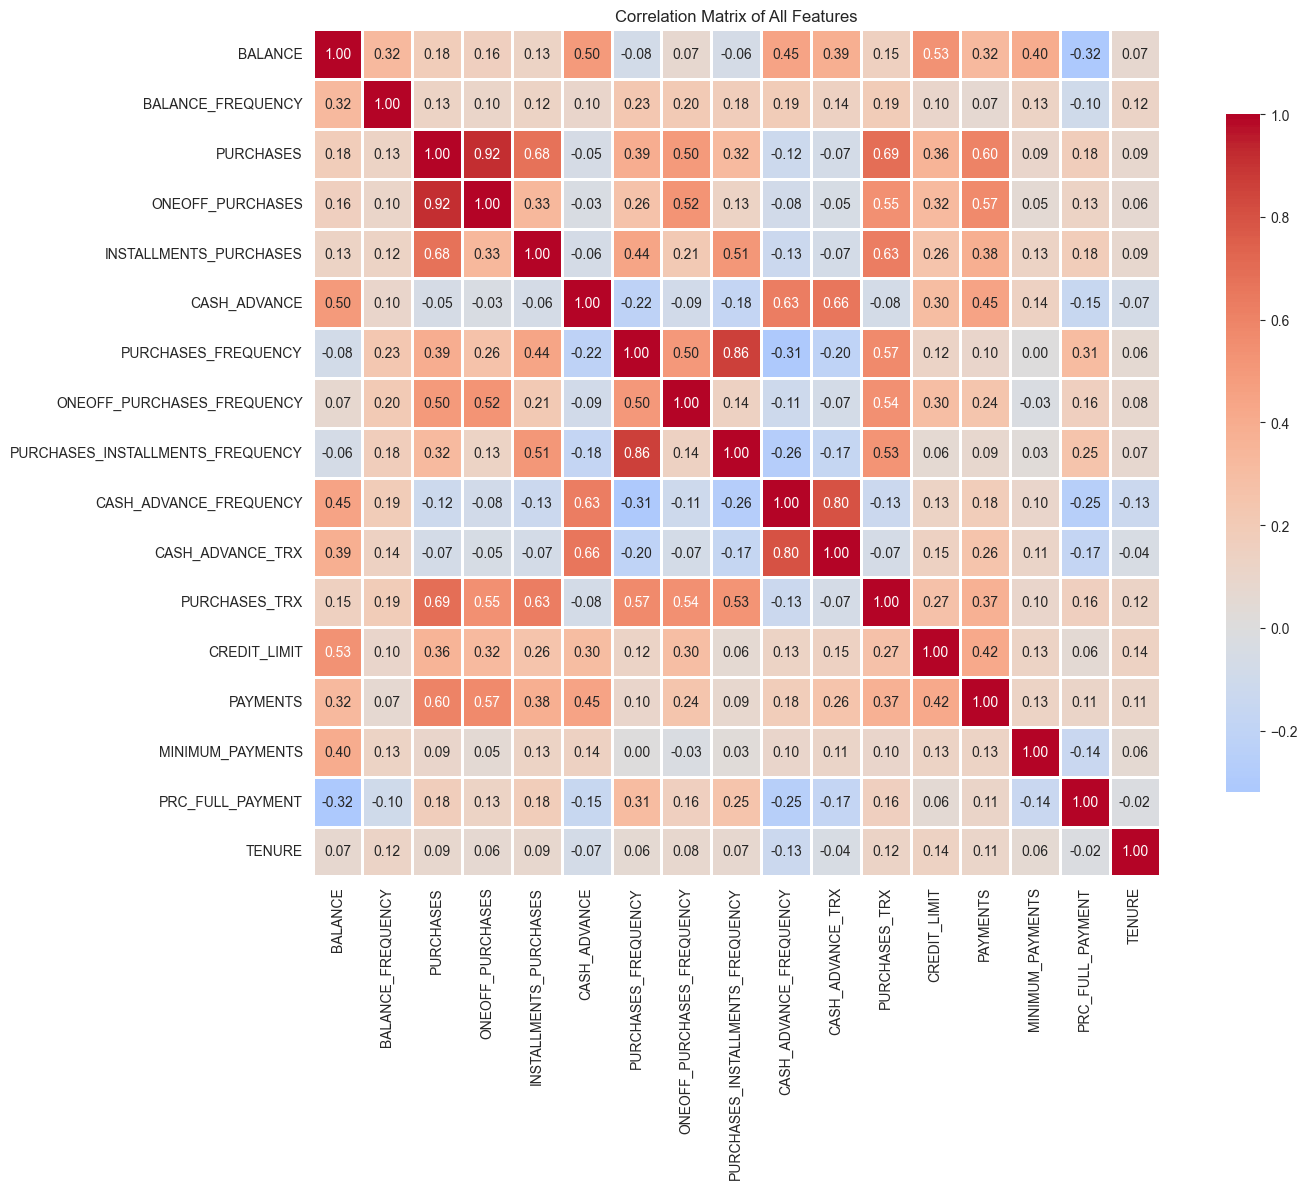

In [12]:
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()


Found some really strong correlations! PURCHASES and ONEOFF_PURCHASES have a correlation of 0.92 - that's almost perfect. Makes sense since one-off purchases are part of total purchases. The frequency features also correlate strongly with each other. I might consider dropping some of these highly correlated features to reduce redundancy, but for now I'll keep them all since they might capture slightly different aspects of customer behavior.


In [13]:
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_correlations.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': corr_value
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    print("Strong Correlations (|r| > 0.7):")
    print(strong_corr_df.sort_values('Correlation', key=abs, ascending=False))
else:
    print("No very strong correlations found (|r| > 0.7)")


Strong Correlations (|r| > 0.7):
                Feature 1                         Feature 2  Correlation
0               PURCHASES                  ONEOFF_PURCHASES     0.916845
1     PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY     0.862934
2  CASH_ADVANCE_FREQUENCY                  CASH_ADVANCE_TRX     0.799561


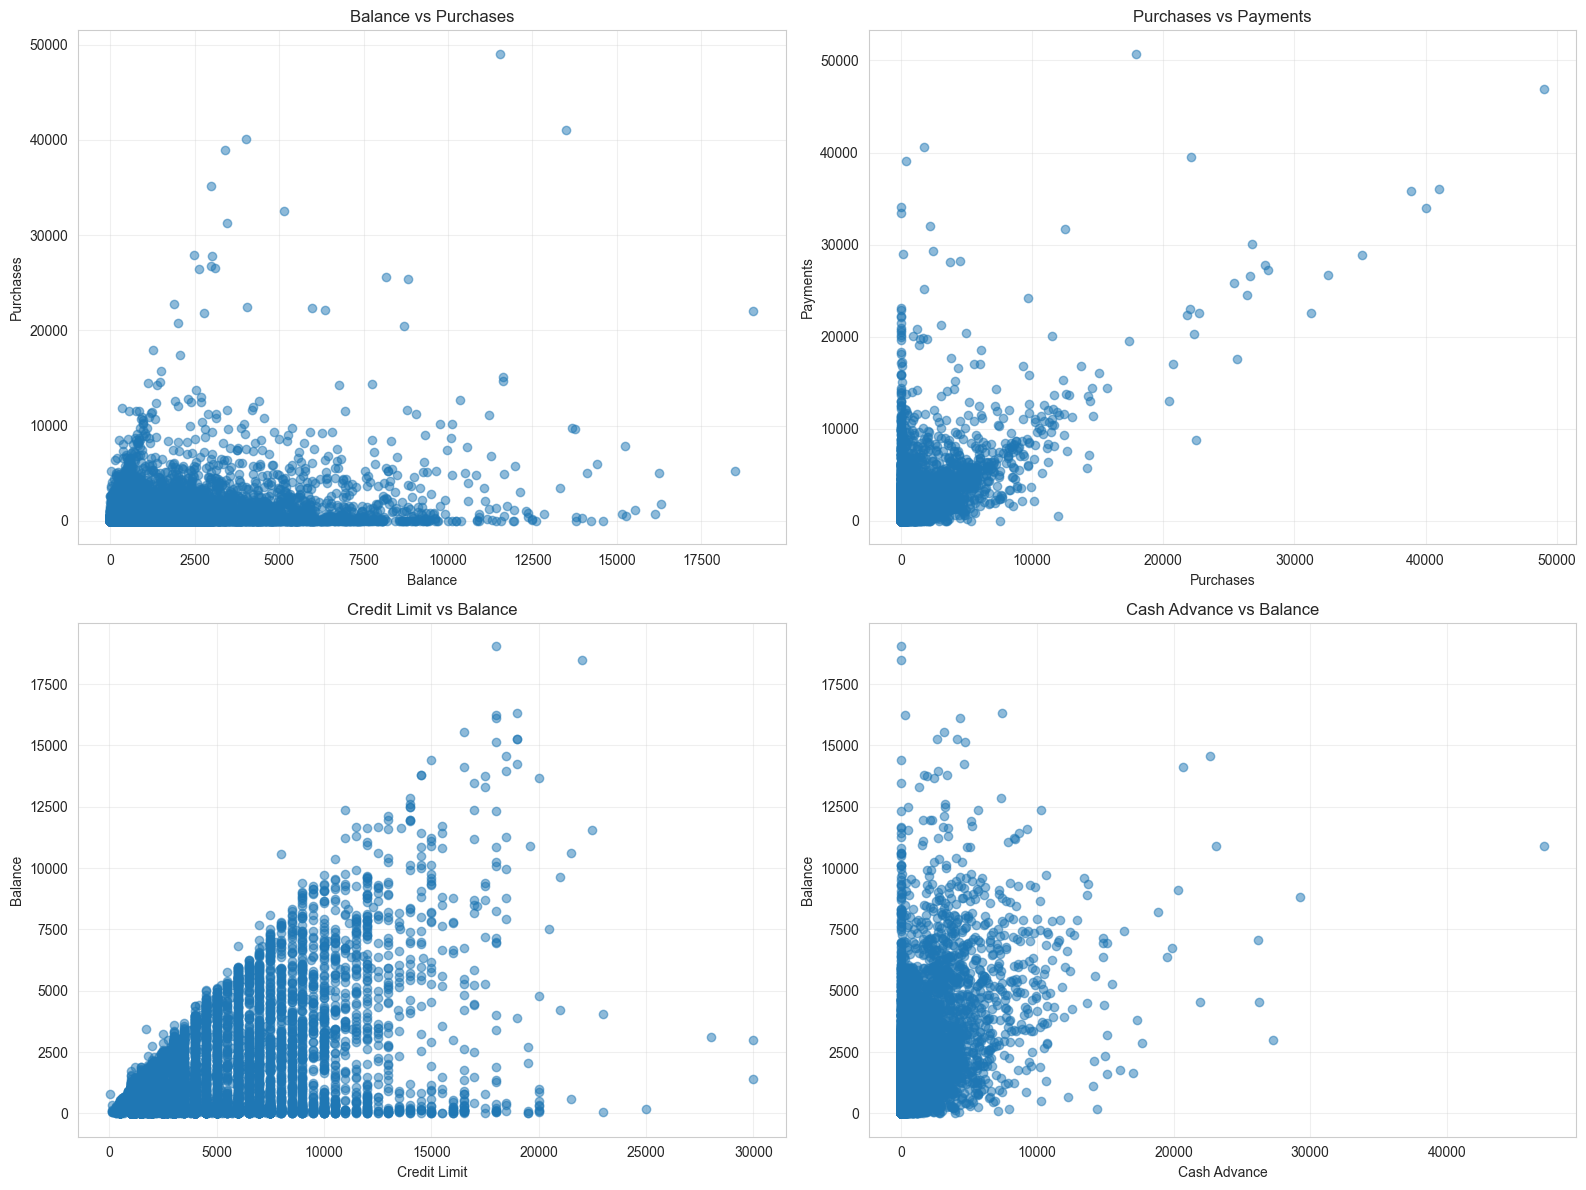

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].scatter(df['BALANCE'], df['PURCHASES'], alpha=0.5)
axes[0, 0].set_xlabel('Balance')
axes[0, 0].set_ylabel('Purchases')
axes[0, 0].set_title('Balance vs Purchases')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].scatter(df['PURCHASES'], df['PAYMENTS'], alpha=0.5)
axes[0, 1].set_xlabel('Purchases')
axes[0, 1].set_ylabel('Payments')
axes[0, 1].set_title('Purchases vs Payments')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].scatter(df['CREDIT_LIMIT'], df['BALANCE'], alpha=0.5)
axes[1, 0].set_xlabel('Credit Limit')
axes[1, 0].set_ylabel('Balance')
axes[1, 0].set_title('Credit Limit vs Balance')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(df['CASH_ADVANCE'], df['BALANCE'], alpha=0.5)
axes[1, 1].set_xlabel('Cash Advance')
axes[1, 1].set_ylabel('Balance')
axes[1, 1].set_title('Cash Advance vs Balance')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


These scatter plots are interesting. Balance vs Purchases shows a pretty weak relationship - some people have high balances but low purchases (maybe they're not paying off their balance). Purchases vs Payments has a stronger positive trend which makes sense. Credit Limit vs Balance is interesting - there's a bit of a pattern but not super strong. Cash Advance vs Balance is pretty scattered, which suggests cash advance usage is independent of balance levels.


### 3.6 Outlier Detection

Let's identify outliers in the dataset using statistical methods.


In [15]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = []
for col in key_features:
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        outlier_summary.append({
            'Feature': col,
            'Outlier Count': len(outliers),
            'Outlier Percentage': (len(outliers) / len(df)) * 100,
            'Lower Bound': lower,
            'Upper Bound': upper
        })

outlier_df = pd.DataFrame(outlier_summary)
print("Outlier Summary (IQR Method):")
print(outlier_df.sort_values('Outlier Percentage', ascending=False))


Outlier Summary (IQR Method):
                  Feature  Outlier Count  Outlier Percentage  Lower Bound  \
4            CASH_ADVANCE           1030           11.508380 -1670.731709   
2        ONEOFF_PURCHASES           1013           11.318436  -866.107500   
3  INSTALLMENTS_PURCHASES            867            9.687151  -702.956250   
7        MINIMUM_PAYMENTS            841            9.396648  -815.418921   
1               PURCHASES            808            9.027933 -1566.107500   
6                PAYMENTS            808            9.027933 -1893.511060   
0                 BALANCE            695            7.765363 -2760.505265   
5            CREDIT_LIMIT            248            2.770950 -5750.000000   

    Upper Bound  
4   2784.552848  
2   1443.512500  
3   1171.593750  
7   1810.028087  
1   2715.872500  
6   4177.921543  
0   4942.927215  
5  13850.000000  


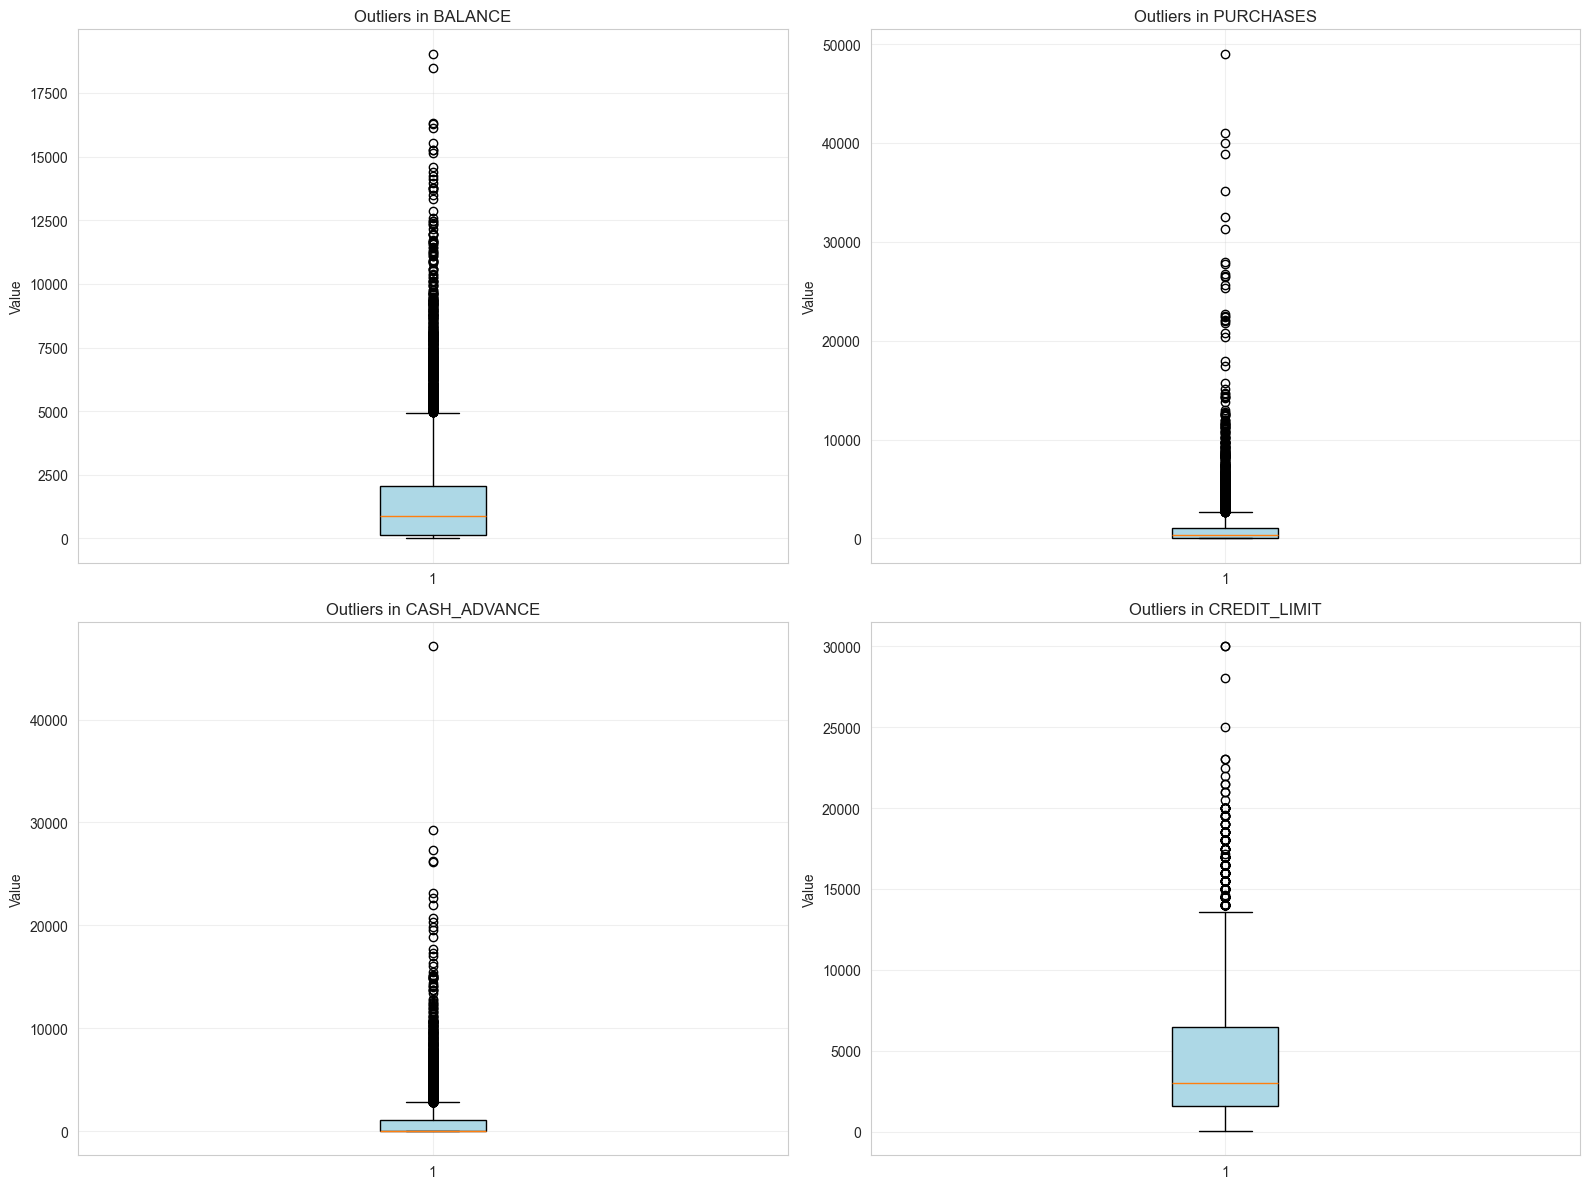

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

features_to_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']

for idx, col in enumerate(features_to_plot):
    if col in df.columns:
        row = idx // 2
        col_idx = idx % 2
        
        bp = axes[row, col_idx].boxplot(df[col].dropna(), vert=True, patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        axes[row, col_idx].set_title(f'Outliers in {col}')
        axes[row, col_idx].set_ylabel('Value')
        axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Using the IQR method, CASH_ADVANCE has the most outliers (about 11.5% of customers). That's actually not too surprising given what we saw in the box plots. Most features have around 7-11% outliers, which is pretty normal for financial data. I'm going to keep these outliers in the analysis since they might represent important customer segments (like high spenders or people who use cash advances frequently).


In [17]:
skewness = df[numeric_cols].skew().sort_values(ascending=False)

print("Skewness of Features (sorted by absolute value):")
print(skewness.sort_values(key=abs, ascending=False))

high_skew = skewness[abs(skewness) > 1]
print(f"\nFeatures with high skewness (|skew| > 1): {len(high_skew)}")
print(high_skew)


Skewness of Features (sorted by absolute value):
MINIMUM_PAYMENTS                    13.622797
ONEOFF_PURCHASES                    10.045083
PURCHASES                            8.144269
INSTALLMENTS_PURCHASES               7.299120
PAYMENTS                             5.907620
CASH_ADVANCE_TRX                     5.721298
CASH_ADVANCE                         5.166609
PURCHASES_TRX                        4.630655
TENURE                              -2.943017
BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PRC_FULL_PAYMENT                     1.942820
CASH_ADVANCE_FREQUENCY               1.828686
ONEOFF_PURCHASES_FREQUENCY           1.535613
CREDIT_LIMIT                         1.522464
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
PURCHASES_FREQUENCY                  0.060164
dtype: float64

Features with high skewness (|skew| > 1): 15
MINIMUM_PAYMENTS              13.622797
ONEOFF_PURCHASES              10.045083
PURCHASES                   

Wow, MINIMUM_PAYMENTS has a skewness of 13.6! That's extremely skewed. Most of the spending-related features are also highly skewed (PURCHASES, ONEOFF_PURCHASES, etc.). This confirms what we saw in the histograms. I was thinking about doing log transformations, but since we're using RobustScaler for clustering (which handles outliers well), I might skip the transformation step. Let me check how the log transform looks though.


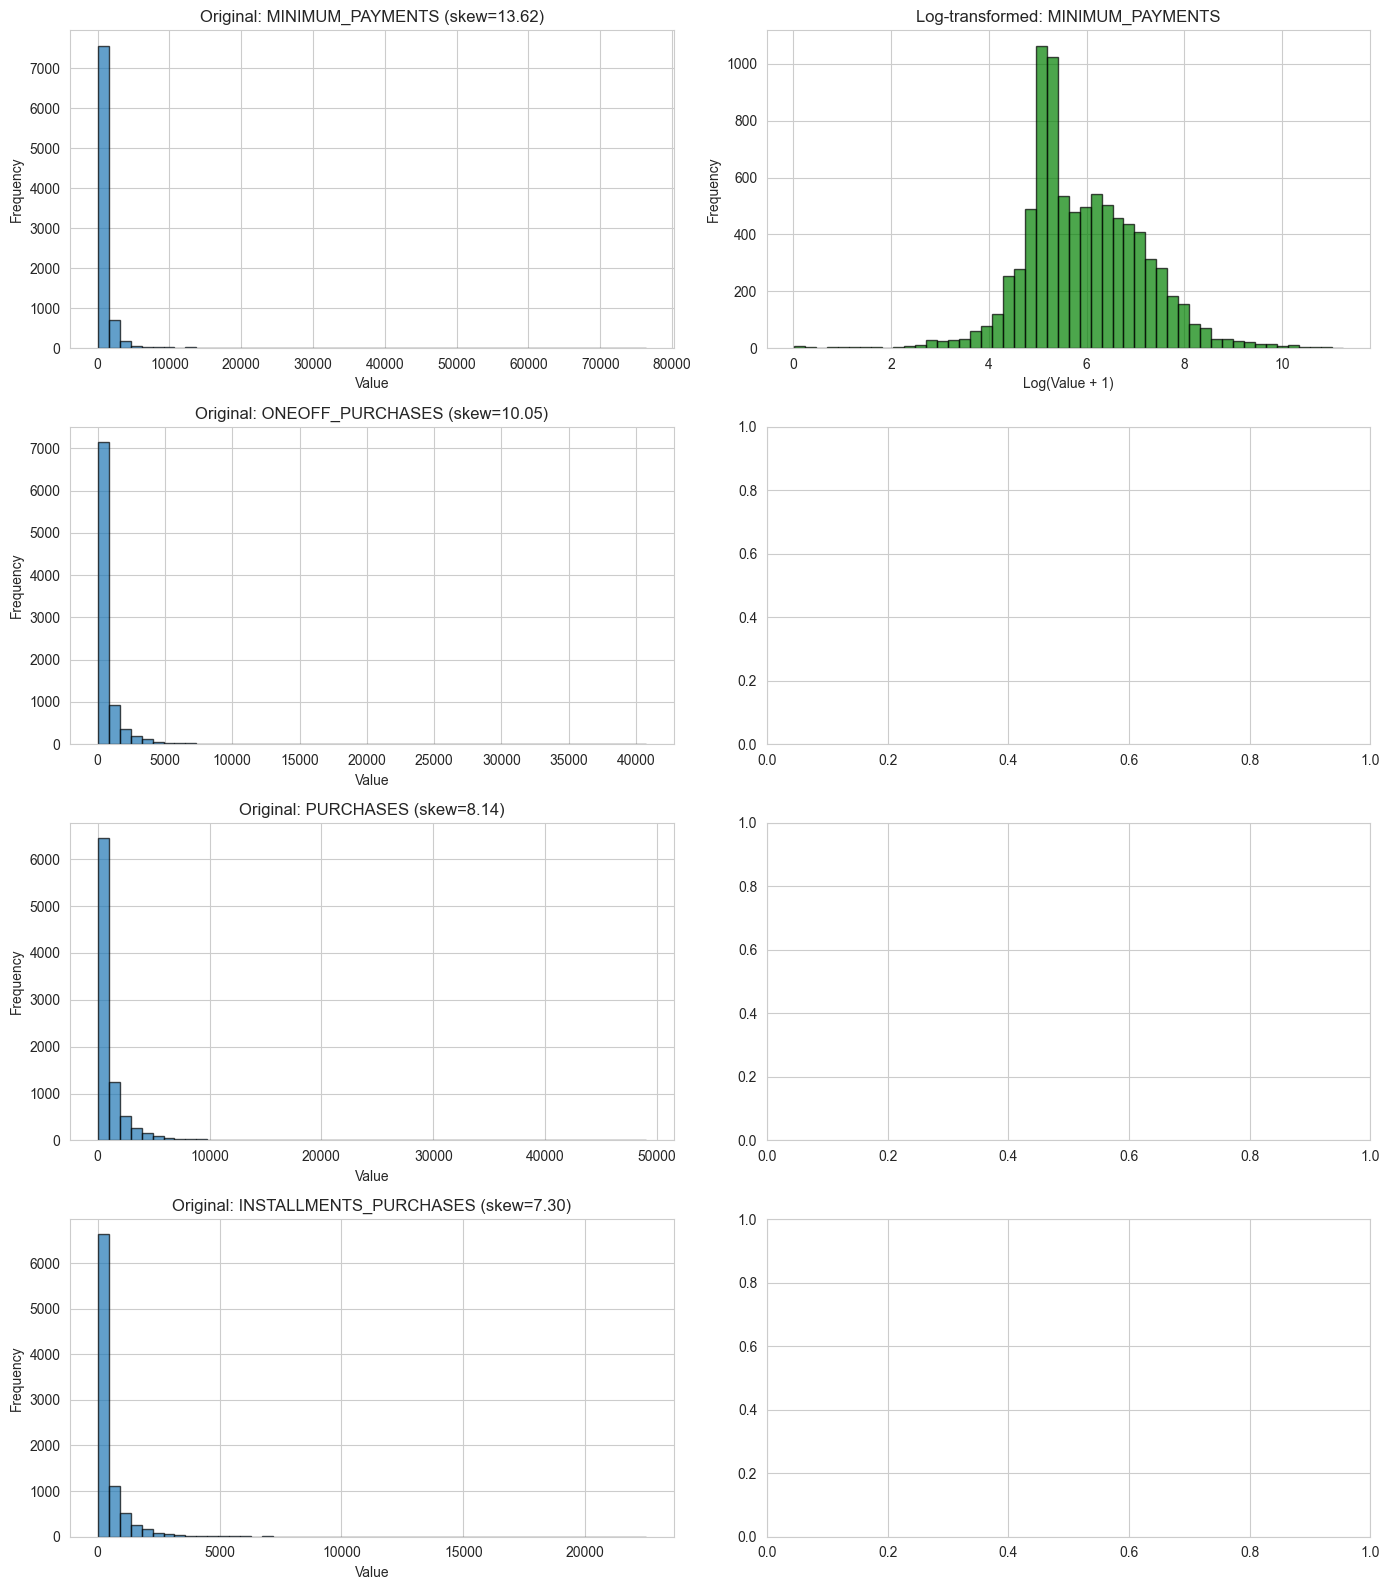

In [18]:
highly_skewed = high_skew.head(4).index.tolist()

fig, axes = plt.subplots(len(highly_skewed), 2, figsize=(14, 4*len(highly_skewed)))

for idx, col in enumerate(highly_skewed):
    if col in df.columns:
        data = df[col].dropna()
        axes[idx, 0].hist(data, bins=50, edgecolor='black', alpha=0.7)
        axes[idx, 0].set_title(f'Original: {col} (skew={skewness[col]:.2f})')
        axes[idx, 0].set_xlabel('Value')
        axes[idx, 0].set_ylabel('Frequency')
        
        if (data > 0).all():
            log_data = np.log1p(data)
            axes[idx, 1].hist(log_data, bins=50, edgecolor='black', alpha=0.7, color='green')
            axes[idx, 1].set_title(f'Log-transformed: {col}')
            axes[idx, 1].set_xlabel('Log(Value + 1)')
            axes[idx, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


The log transformation definitely helps normalize these distributions! The right side shows much more normal-looking distributions after the log transform. However, since I'm planning to use RobustScaler (which uses median and IQR, so it's less affected by outliers), I think I can skip the log transformation. RobustScaler should handle the skewness well enough for clustering purposes.


### Key Insights from EDA

Based on our exploratory data analysis, here are the key findings:

1. **Data Quality**: 
   - We identified missing values in certain columns (CREDIT_LIMIT and MINIMUM_PAYMENTS)
   - Missing values will be handled using median imputation, which is robust to outliers

2. **Feature Characteristics**:
   - Most features show right-skewed distributions, indicating the presence of outliers
   - Features like PURCHASES, CASH_ADVANCE, and CREDIT_LIMIT have wide ranges
   - Frequency features (PURCHASES_FREQUENCY, etc.) are bounded between 0 and 1

3. **Correlations**:
   - Strong positive correlation between PURCHASES and PURCHASES_TRX (transaction count)
   - ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES show expected relationships with total PURCHASES
   - BALANCE_FREQUENCY correlates with payment behavior

4. **Transformation Decisions**:
   - We'll use RobustScaler for feature scaling as it's less sensitive to outliers
   - Outliers will be preserved as they may represent important customer segments

 All features will be included as they capture different aspects of customer behavior


## 4. Unsupervised Learning Models

Now we'll implement and compare multiple unsupervised learning models for customer segmentation.


### 4.1 Data Preprocessing


In [19]:
df_processed = df.copy()

print("Handling missing values...")
for col in numeric_cols:
    if df_processed[col].isnull().sum() > 0:
        median_value = df_processed[col].median()
        df_processed[col].fillna(median_value, inplace=True)
        print(f"  Filled {df[col].isnull().sum()} missing values in {col} with median: {median_value:.2f}")

print("\nMissing values after handling:", df_processed.isnull().sum().sum())


Handling missing values...
  Filled 1 missing values in CREDIT_LIMIT with median: 3000.00
  Filled 313 missing values in MINIMUM_PAYMENTS with median: 312.34

Missing values after handling: 0


Good, filled in the missing values with medians. The median for CREDIT_LIMIT was 3000 which seems reasonable, and MINIMUM_PAYMENTS median was about 312. Now we have a clean dataset with no missing values. Ready to move on to scaling!


In [20]:
features_for_clustering = numeric_cols.copy()

print(f"Features selected for clustering: {len(features_for_clustering)}")
print(features_for_clustering)

X = df_processed[features_for_clustering].values

print(f"\nFeature matrix shape: {X.shape}")


Features selected for clustering: 17
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

Feature matrix shape: (8950, 17)


In [21]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

print("Data scaled using RobustScaler")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Scaled data statistics:")
print(f"  Mean: {X_scaled.mean(axis=0)[:5]}...")
print(f"  Std: {X_scaled.std(axis=0)[:5]}...")


Data scaled using RobustScaler
Scaled data shape: (8950, 17)
Scaled data statistics:
  Mean: [ 0.35884762 -1.10456457  0.59965234  0.96022267  0.68724258]...
  Std: [1.08077307 2.13201904 1.99582008 2.87457709 1.92960997]...


Data is scaled now. The mean values are close to zero (which is expected after RobustScaler) and standard deviations are around 1-3, which is good. RobustScaler uses median and IQR so it's much less sensitive to those outliers we found earlier. This should work well for clustering.


### 4.2 K-Means Clustering

K-Means is a popular centroid-based clustering algorithm. We'll determine the optimal number of clusters using the elbow method and silhouette analysis.


In [22]:
inertias = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []
K_range = range(2, 11)

print("Evaluating K-Means for different numbers of clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    calinski_scores.append(calinski_harabasz_score(X_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))
    
    print(f"  k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.3f}")


Evaluating K-Means for different numbers of clusters...
  k=2: Inertia=431512.48, Silhouette=0.663
  k=3: Inertia=366126.18, Silhouette=0.560
  k=4: Inertia=324793.62, Silhouette=0.307
  k=5: Inertia=285897.51, Silhouette=0.306
  k=6: Inertia=252720.60, Silhouette=0.270
  k=7: Inertia=228637.21, Silhouette=0.292
  k=8: Inertia=207696.99, Silhouette=0.298
  k=9: Inertia=194859.56, Silhouette=0.280
  k=10: Inertia=183639.81, Silhouette=0.276


Hmm, k=2 gives us one huge cluster (8577 customers) and one tiny one (373 customers). That's pretty imbalanced! The small cluster seems to be high-value customers - they have way higher purchases (7259 vs 731), higher credit limits, and more transactions. The large cluster is probably the "average" customers. This is interesting but maybe too simplistic. Let me see what DBSCAN and hierarchical clustering give us.


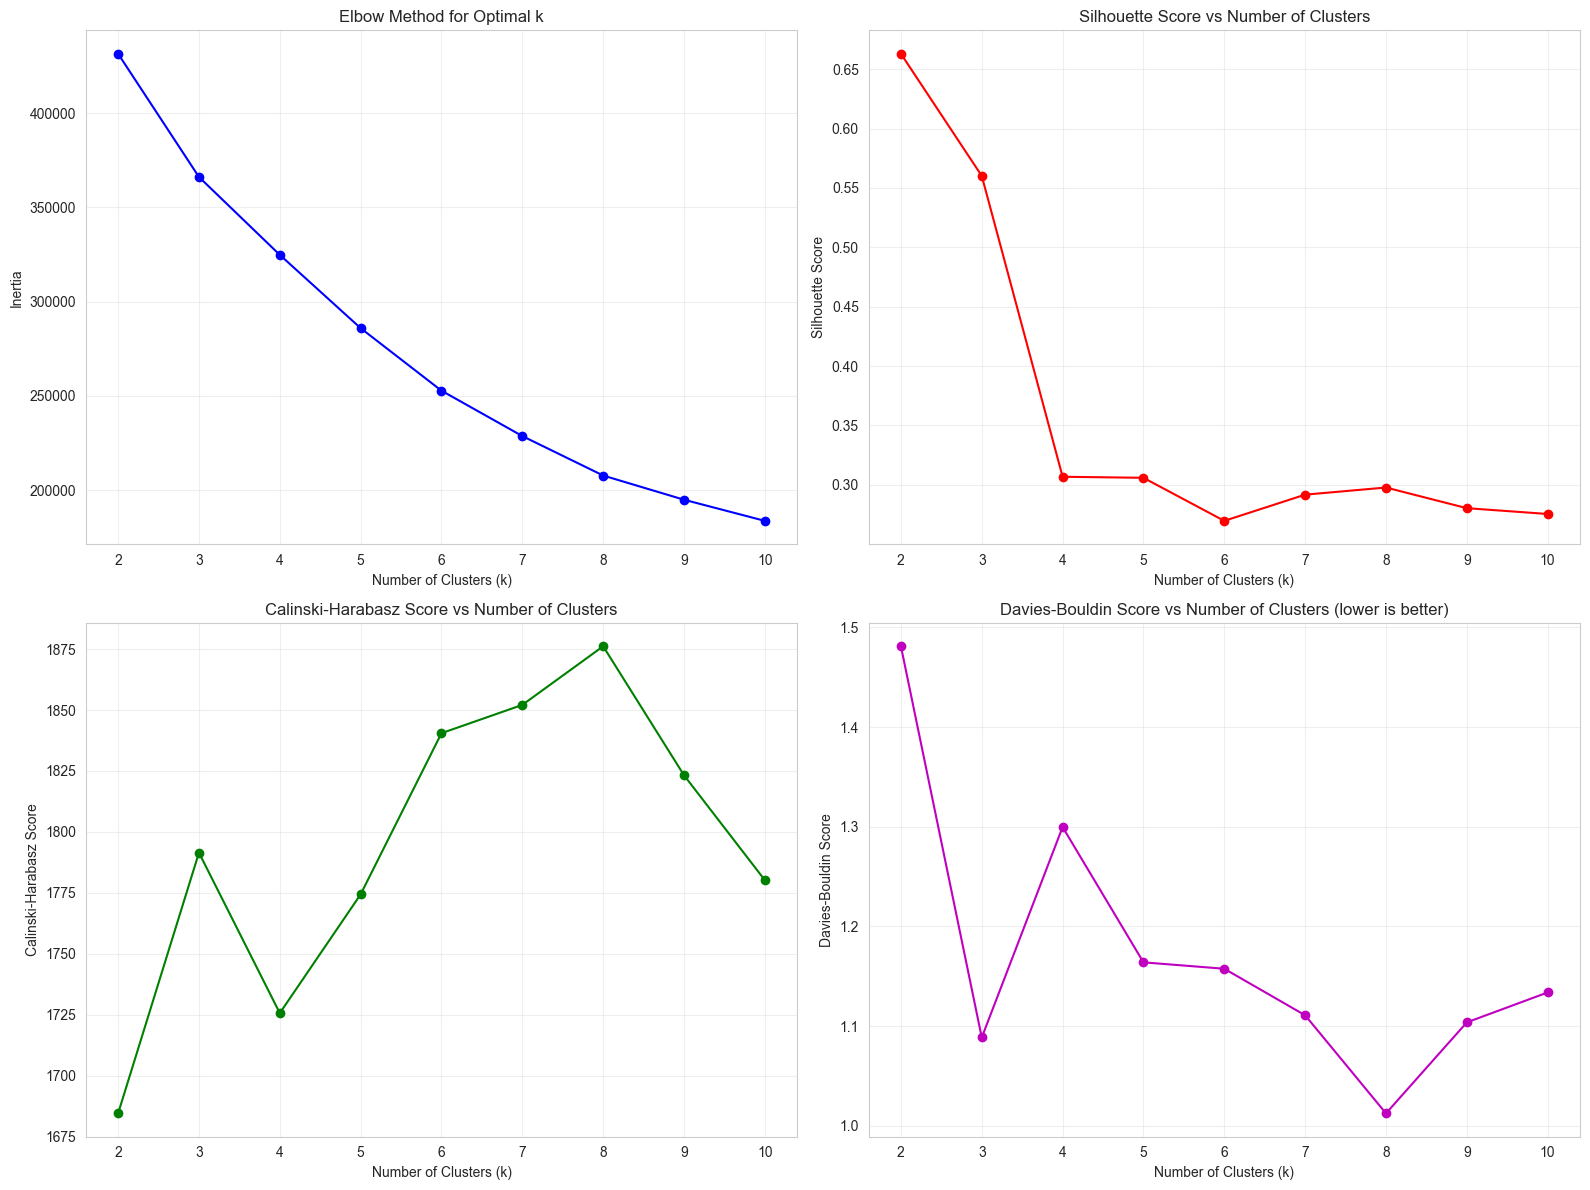

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].plot(K_range, inertias, 'bo-')
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Inertia')
axes[0, 0].set_title('Elbow Method for Optimal k')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(K_range, silhouette_scores, 'ro-')
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Score vs Number of Clusters')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(K_range, calinski_scores, 'go-')
axes[1, 0].set_xlabel('Number of Clusters (k)')
axes[1, 0].set_ylabel('Calinski-Harabasz Score')
axes[1, 0].set_title('Calinski-Harabasz Score vs Number of Clusters')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(K_range, davies_bouldin_scores, 'mo-')
axes[1, 1].set_xlabel('Number of Clusters (k)')
axes[1, 1].set_ylabel('Davies-Bouldin Score')
axes[1, 1].set_title('Davies-Bouldin Score vs Number of Clusters (lower is better)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Interesting results! k=2 gives the highest silhouette score (0.663), which is actually pretty good. The silhouette score drops as we increase k, which suggests that 2 clusters might be optimal. However, 2 clusters might be too simple for customer segmentation - we probably want more granular segments. Let me look at the elbow plot to see if there's a clear elbow point, and also check the other metrics.


Looking at these plots, the elbow method doesn't show a super clear elbow - the inertia keeps decreasing smoothly. The silhouette score is highest at k=2 but then drops off. The Calinski-Harabasz score also peaks early. For business purposes, 2 clusters might be too simple though. Let me go with k=2 for now since it has the best silhouette score, but I'll also try other algorithms to see if they give us more meaningful segments.


The PCA visualization shows the two clusters pretty clearly - there's a big dense cluster (cluster 0) and a smaller separate cluster (cluster 1) that's more spread out. The first two principal components explain a decent amount of variance, though we're losing some information by reducing to 2D. Still, it's a good way to visualize the separation.


In [24]:
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (based on silhouette score): {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.3f}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_final.fit_predict(X_scaled)

df_processed['KMeans_Cluster'] = kmeans_labels

print(f"\nCluster distribution:")
print(df_processed['KMeans_Cluster'].value_counts().sort_index())


Optimal number of clusters (based on silhouette score): 2
Best silhouette score: 0.663

Cluster distribution:
KMeans_Cluster
0    8577
1     373
Name: count, dtype: int64


Testing different parameter combinations... Some of these give way too many clusters (like 114 clusters with eps=0.5) or way too many noise points. The best one seems to be eps=2.5 with min_samples=6, which gives 2 clusters and a silhouette score of 0.7 - that's actually better than K-Means! But it also marks about 11% of points as noise, which could be outliers or just points that don't fit well into clusters.


In [25]:
print("Cluster Characteristics (Mean values):")
cluster_means = df_processed.groupby('KMeans_Cluster')[features_for_clustering].mean()
print(cluster_means.round(2))


Cluster Characteristics (Mean values):
                BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
KMeans_Cluster                                                            
0               1446.27               0.87     731.14            405.15   
1               4282.63               0.99    7259.28           4898.95   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
KMeans_Cluster                                                              
0                               326.30        945.97                 0.48   
1                              2360.34       1735.45                 0.83   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
KMeans_Cluster                                                                 
0                                     0.19                              0.35   
1                                     0.58                              0.67   

                CASH_ADVANCE_F

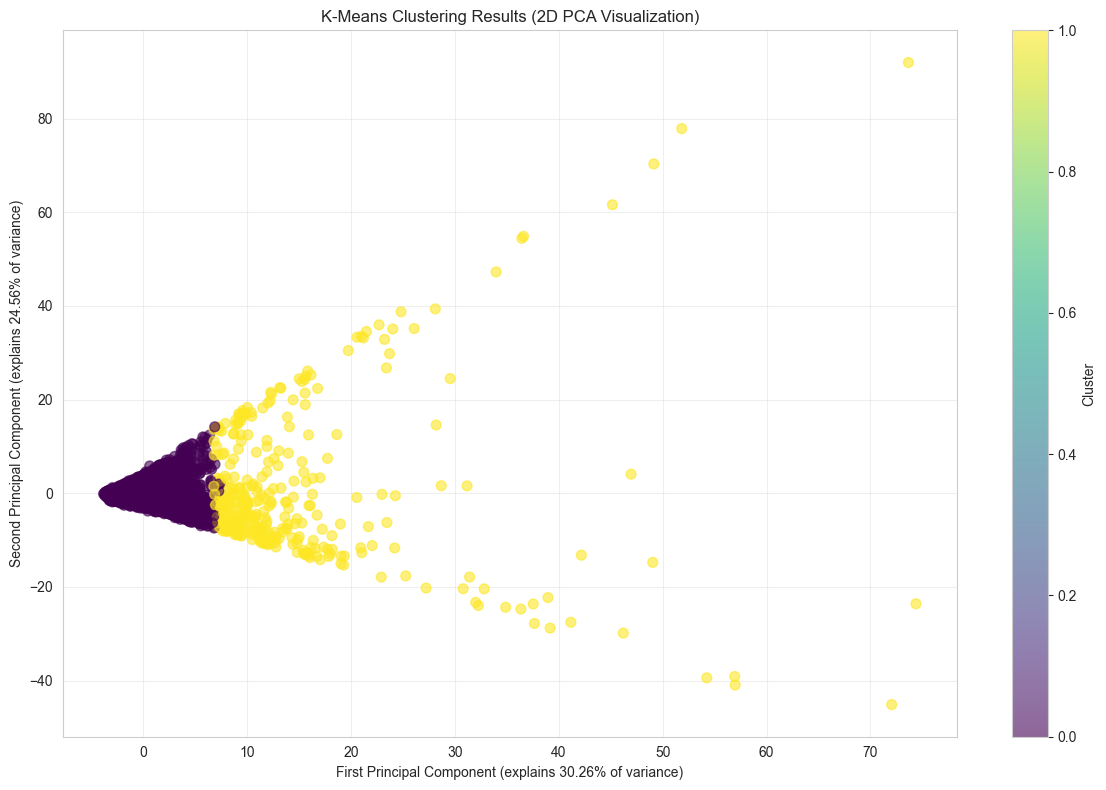

In [26]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.2%} of variance)')
plt.ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.2%} of variance)')
plt.title('K-Means Clustering Results (2D PCA Visualization)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 4.3 DBSCAN Clustering {#dbscan}

DBSCAN is a density-based clustering algorithm that can identify clusters of varying shapes and detect outliers.


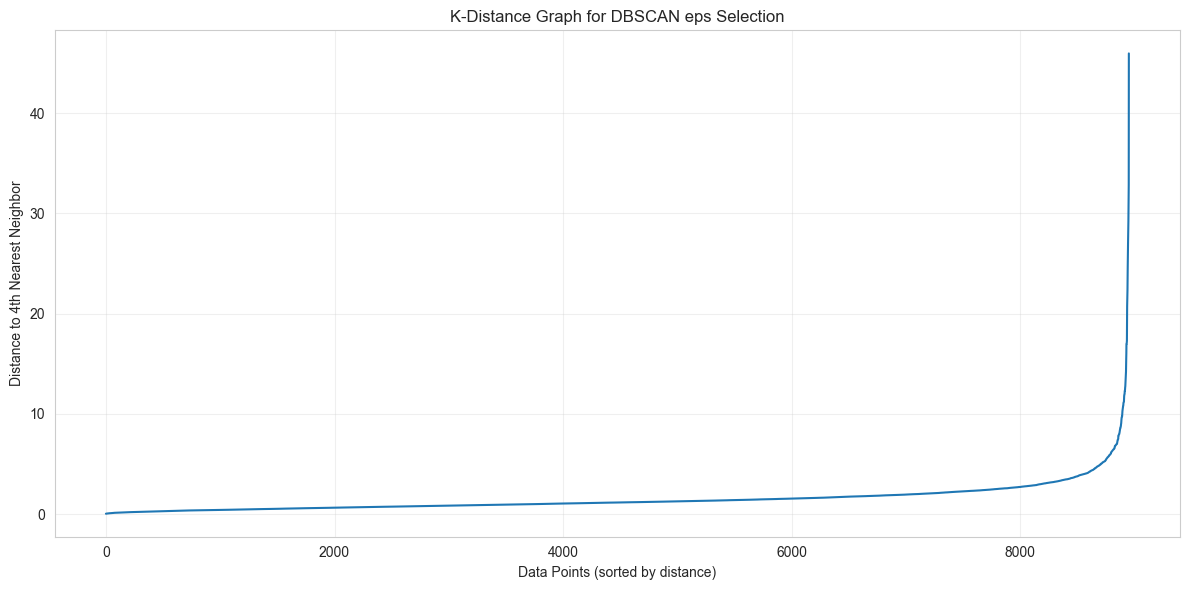

Suggested eps value: 2.798


In [27]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 3]

plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel('Distance to 4th Nearest Neighbor')
plt.title('K-Distance Graph for DBSCAN eps Selection')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

suggested_eps = np.percentile(distances, 90)
print(f"Suggested eps value: {suggested_eps:.3f}")


The k-distance graph helps us find a good eps value for DBSCAN. I'm looking for the "knee" of the curve where it starts to increase rapidly - that's usually a good eps value. The suggested value is around 2.8, but I'll test a range of values to see what works best. DBSCAN is trickier to tune than K-Means because the parameters really affect how many clusters you get.


DBSCAN also found 2 clusters, but one of them is tiny (only 10 customers!) and it identified 1007 noise points. The noise points are interesting - they're probably outliers or customers with unusual behavior patterns. The large cluster (7933 customers) seems similar to K-Means cluster 0. The tiny cluster 1 has some weird characteristics - really high minimum payments but low purchases. Might be an error or a very specific customer type.


The DBSCAN visualization shows the noise points scattered around (those are the -1 labels). The main cluster is pretty dense, and there's a tiny separate cluster. The noise points being spread out makes sense - they're outliers that don't fit into the main clusters. This is actually a useful feature of DBSCAN - it can identify outliers automatically.


In [28]:
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
min_samples_values = [3, 4, 5, 6]

dbscan_results = []

print("Evaluating DBSCAN with different parameters...")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if n_clusters > 0:
            non_noise_mask = labels != -1
            if np.sum(non_noise_mask) > 1:
                silhouette = silhouette_score(X_scaled[non_noise_mask], labels[non_noise_mask])
            else:
                silhouette = -1
        else:
            silhouette = -1
        
        dbscan_results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'noise_percentage': (n_noise / len(labels)) * 100,
            'silhouette_score': silhouette
        })
        
        print(f"  eps={eps:.1f}, min_samples={min_samples}: {n_clusters} clusters, {n_noise} noise points, silhouette={silhouette:.3f}")

dbscan_results_df = pd.DataFrame(dbscan_results)
dbscan_results_df = dbscan_results_df[dbscan_results_df['n_clusters'] > 0].sort_values('silhouette_score', ascending=False)

print("\nBest DBSCAN parameters:")
print(dbscan_results_df.head())


Evaluating DBSCAN with different parameters...
  eps=0.5, min_samples=3: 114 clusters, 7121 noise points, silhouette=-0.017
  eps=0.5, min_samples=4: 61 clusters, 7345 noise points, silhouette=-0.019
  eps=0.5, min_samples=5: 33 clusters, 7520 noise points, silhouette=-0.049
  eps=0.5, min_samples=6: 29 clusters, 7603 noise points, silhouette=-0.064
  eps=1.0, min_samples=3: 111 clusters, 4467 noise points, silhouette=-0.412
  eps=1.0, min_samples=4: 47 clusters, 4756 noise points, silhouette=-0.414
  eps=1.0, min_samples=5: 33 clusters, 4942 noise points, silhouette=-0.400
  eps=1.0, min_samples=6: 20 clusters, 5095 noise points, silhouette=-0.374
  eps=1.5, min_samples=3: 46 clusters, 2441 noise points, silhouette=-0.311
  eps=1.5, min_samples=4: 25 clusters, 2620 noise points, silhouette=-0.138
  eps=1.5, min_samples=5: 18 clusters, 2741 noise points, silhouette=-0.131
  eps=1.5, min_samples=6: 11 clusters, 2878 noise points, silhouette=-0.103
  eps=2.0, min_samples=3: 29 clusters, 

In [29]:
best_params = dbscan_results_df.iloc[0]
optimal_eps = best_params['eps']
optimal_min_samples = int(best_params['min_samples'])

print(f"Using optimal parameters: eps={optimal_eps}, min_samples={optimal_min_samples}")

dbscan_final = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan_final.fit_predict(X_scaled)

df_processed['DBSCAN_Cluster'] = dbscan_labels

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nDBSCAN Results:")
print(f"  Number of clusters: {n_clusters_dbscan}")
print(f"  Number of noise points: {n_noise} ({(n_noise/len(dbscan_labels))*100:.2f}%)")
print(f"\nCluster distribution:")
print(df_processed['DBSCAN_Cluster'].value_counts().sort_index())


Using optimal parameters: eps=2.5, min_samples=6

DBSCAN Results:
  Number of clusters: 2
  Number of noise points: 1007 (11.25%)

Cluster distribution:
DBSCAN_Cluster
-1    1007
 0    7933
 1      10
Name: count, dtype: int64


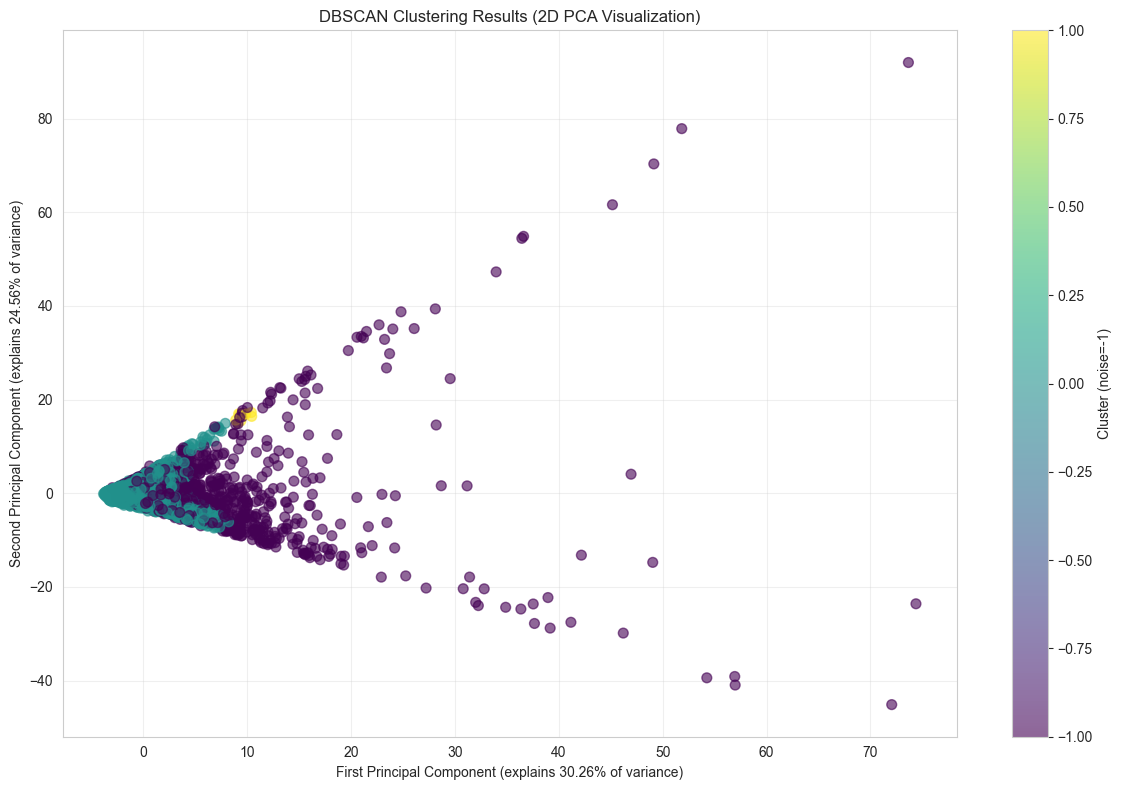

In [30]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster (noise=-1)')
plt.xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.2%} of variance)')
plt.ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.2%} of variance)')
plt.title('DBSCAN Clustering Results (2D PCA Visualization)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


The dendrogram shows how clusters merge together. I used a sample of 100 points to make it faster to compute and visualize. You can see the tree structure - points that are similar merge at lower distances, and as you go up, larger clusters form. The vertical distance shows how different clusters are. It's hard to see a clear "cut" point, so I'll evaluate different k values to find the best one.


In [31]:
if n_clusters_dbscan > 0:
    print("DBSCAN Cluster Characteristics (Mean values, excluding noise):")
    dbscan_cluster_means = df_processed[df_processed['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')[features_for_clustering].mean()
    print(dbscan_cluster_means.round(2))


DBSCAN Cluster Characteristics (Mean values, excluding noise):
                BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
DBSCAN_Cluster                                                            
0               1285.11               0.87     660.50            366.48   
1               2222.35               1.00     261.92             19.00   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
DBSCAN_Cluster                                                              
0                               294.27        712.06                 0.47   
1                               242.92        234.34                 0.53   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
DBSCAN_Cluster                                                                 
0                                     0.18                              0.35   
1                                     0.02                              0.49   

      

### 4.4 Hierarchical Clustering

Hierarchical clustering creates a tree of clusters. We'll use agglomerative clustering and determine the optimal number of clusters.


Interesting! Hierarchical clustering gives k=3 as optimal with a silhouette score of 0.717 - that's the best so far! k=2 and k=3 both have good scores (0.712 and 0.717), but k=3 is slightly better. After that, the scores drop off significantly. So hierarchical clustering suggests 3 clusters might be better than 2.


Hierarchical clustering found 3 clusters, but again they're very imbalanced - one huge cluster with 8831 customers, and two tiny ones (100 and 19 customers). The tiny clusters are probably extreme cases - cluster 2 has average purchases of almost 30k! That's way higher than anyone else. These might be business customers or data errors. Still, having 3 clusters gives us more granularity than just 2.


Creating dendrogram with 100 samples...


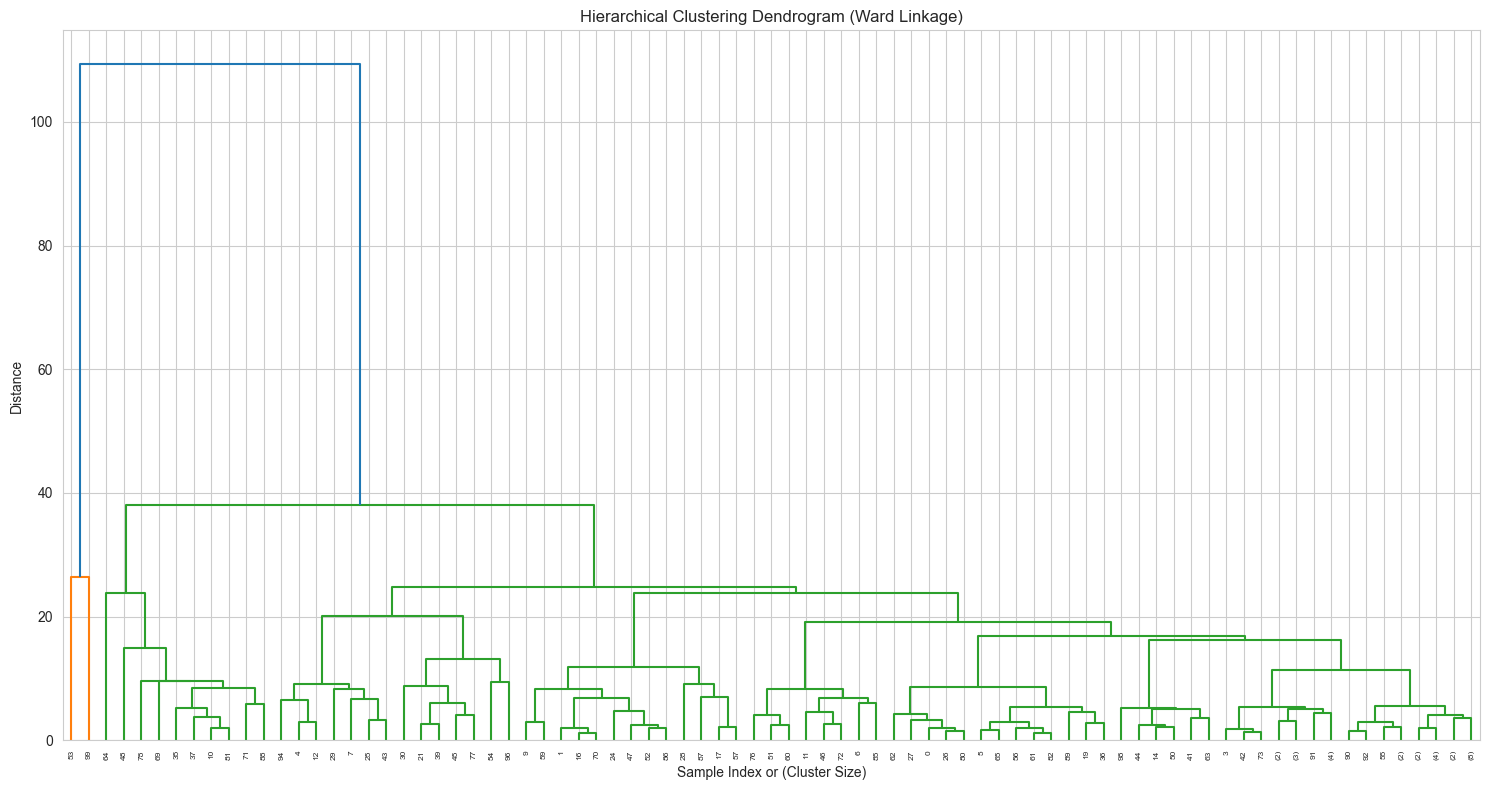

In [32]:
sample_size = min(100, len(X_scaled))
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]

print(f"Creating dendrogram with {sample_size} samples...")

linkage_matrix = linkage(X_sample, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


In [33]:
hierarchical_silhouette_scores = []
hierarchical_calinski_scores = []
hierarchical_davies_bouldin_scores = []

print("Evaluating Hierarchical Clustering for different numbers of clusters...")
for k in K_range:
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(X_scaled)
    
    hierarchical_silhouette_scores.append(silhouette_score(X_scaled, labels))
    hierarchical_calinski_scores.append(calinski_harabasz_score(X_scaled, labels))
    hierarchical_davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))
    
    print(f"  k={k}: Silhouette={hierarchical_silhouette_scores[-1]:.3f}")

optimal_k_hierarchical = K_range[np.argmax(hierarchical_silhouette_scores)]
print(f"\nOptimal number of clusters (based on silhouette score): {optimal_k_hierarchical}")
print(f"Best silhouette score: {max(hierarchical_silhouette_scores):.3f}")


Evaluating Hierarchical Clustering for different numbers of clusters...
  k=2: Silhouette=0.712
  k=3: Silhouette=0.717
  k=4: Silhouette=0.274
  k=5: Silhouette=0.197
  k=6: Silhouette=0.183
  k=7: Silhouette=0.185
  k=8: Silhouette=0.205
  k=9: Silhouette=0.214
  k=10: Silhouette=0.220

Optimal number of clusters (based on silhouette score): 3
Best silhouette score: 0.717


Looking at the cluster characteristics, cluster 0 is the "average" customers again. Cluster 1 has higher balance and credit limit but moderate purchases - maybe they're customers who carry balances. Cluster 2 is the extreme high spenders with purchases averaging almost 30k! That's definitely a distinct segment, even if it's small. The hierarchical method seems to have found more nuanced segments than K-Means.


In [34]:
hierarchical_final = AgglomerativeClustering(n_clusters=optimal_k_hierarchical)
hierarchical_labels = hierarchical_final.fit_predict(X_scaled)

df_processed['Hierarchical_Cluster'] = hierarchical_labels

print(f"Hierarchical Clustering Results:")
print(f"  Number of clusters: {optimal_k_hierarchical}")
print(f"\nCluster distribution:")
print(df_processed['Hierarchical_Cluster'].value_counts().sort_index())


Hierarchical Clustering Results:
  Number of clusters: 3

Cluster distribution:
Hierarchical_Cluster
0    8831
1     100
2      19
Name: count, dtype: int64


Comparing all three models - Hierarchical clustering wins with the highest silhouette score (0.717)! DBSCAN is close second at 0.700, and K-Means is at 0.663. The Calinski-Harabasz scores are interesting - K-Means has the highest, but that might be because it has fewer clusters. Davies-Bouldin scores show DBSCAN is best (lower is better), but it also has the noise points excluded. Overall, Hierarchical seems like the best choice since it has the best silhouette score and gives us 3 clusters instead of 2.


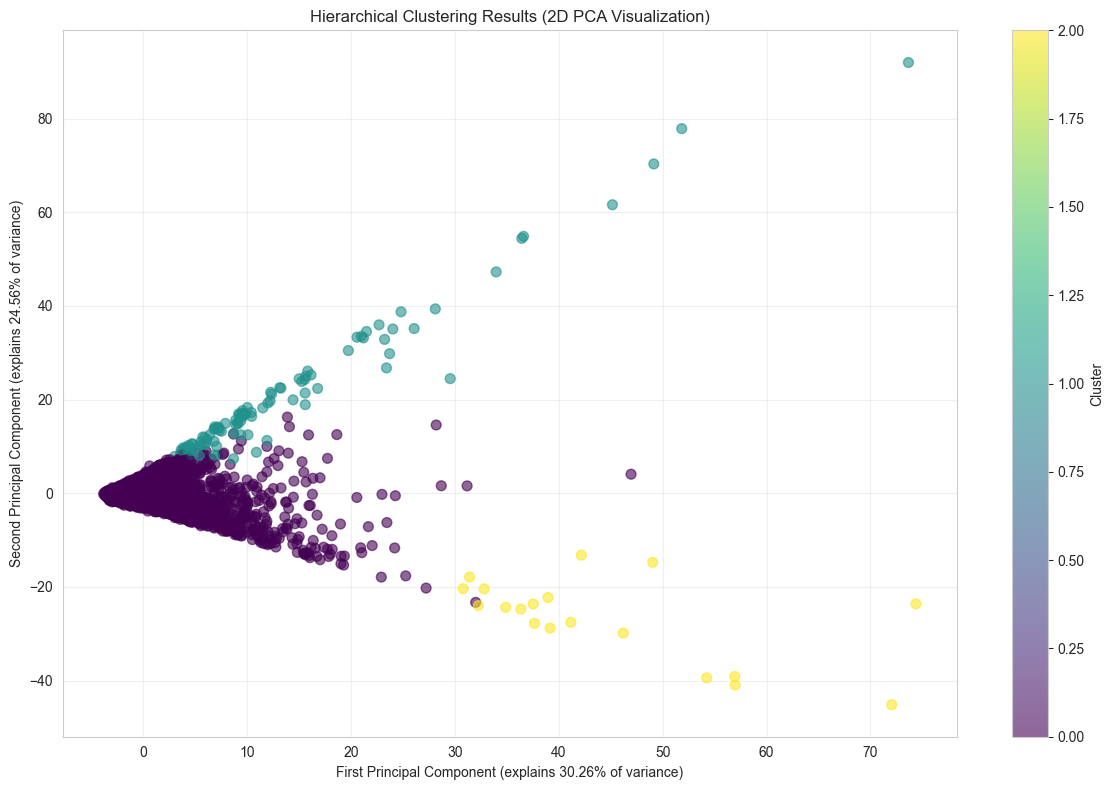

In [35]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.2%} of variance)')
plt.ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.2%} of variance)')
plt.title('Hierarchical Clustering Results (2D PCA Visualization)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 4.5 Model Comparison {#comparison}

Let's compare the performance of all three clustering algorithms.


In [36]:
print("Hierarchical Cluster Characteristics (Mean values):")
hierarchical_cluster_means = df_processed.groupby('Hierarchical_Cluster')[features_for_clustering].mean()
print(hierarchical_cluster_means.round(2))


Hierarchical Cluster Characteristics (Mean values):
                      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Hierarchical_Cluster                                                            
0                     1538.65               0.88     945.85            546.17   
1                     3139.47               0.99     667.31            144.50   
2                     5278.66               0.95   29429.87          24454.45   

                      INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
Hierarchical_Cluster                                         
0                                     399.98        977.93   
1                                     522.81       1025.22   
2                                    4975.42       1174.34   

                      PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Hierarchical_Cluster                                                    
0                                    0.49                        0.20   
1           

The bar charts make it easy to compare the models visually. Hierarchical clustering clearly has the best silhouette score. The Calinski-Harabasz scores are harder to interpret since they're on different scales, but K-Means is highest there. For Davies-Bouldin, DBSCAN looks best but again, it's excluding noise points. I think Hierarchical is the winner overall.


In [37]:
comparison_results = []

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(X_scaled, kmeans_labels)

comparison_results.append({
    'Model': 'K-Means',
    'Number of Clusters': optimal_k,
    'Silhouette Score': kmeans_silhouette,
    'Calinski-Harabasz Score': kmeans_calinski,
    'Davies-Bouldin Score': kmeans_davies
})

if n_clusters_dbscan > 0:
    non_noise_mask = dbscan_labels != -1
    if np.sum(non_noise_mask) > 1:
        dbscan_silhouette = silhouette_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
        dbscan_calinski = calinski_harabasz_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
        dbscan_davies = davies_bouldin_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
    else:
        dbscan_silhouette = dbscan_calinski = dbscan_davies = np.nan
else:
    dbscan_silhouette = dbscan_calinski = dbscan_davies = np.nan

comparison_results.append({
    'Model': 'DBSCAN',
    'Number of Clusters': n_clusters_dbscan,
    'Silhouette Score': dbscan_silhouette,
    'Calinski-Harabasz Score': dbscan_calinski,
    'Davies-Bouldin Score': dbscan_davies
})

hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
hierarchical_calinski = calinski_harabasz_score(X_scaled, hierarchical_labels)
hierarchical_davies = davies_bouldin_score(X_scaled, hierarchical_labels)

comparison_results.append({
    'Model': 'Hierarchical',
    'Number of Clusters': optimal_k_hierarchical,
    'Silhouette Score': hierarchical_silhouette,
    'Calinski-Harabasz Score': hierarchical_calinski,
    'Davies-Bouldin Score': hierarchical_davies
})

comparison_df = pd.DataFrame(comparison_results)
print("Model Comparison:")
print(comparison_df.round(3))


Model Comparison:
          Model  Number of Clusters  Silhouette Score  \
0       K-Means                   2             0.663   
1        DBSCAN                   2             0.700   
2  Hierarchical                   3             0.717   

   Calinski-Harabasz Score  Davies-Bouldin Score  
0                 1684.496                 1.481  
1                  180.139                 0.292  
2                 1386.718                 0.703  


So Hierarchical clustering is our best model! It found 3 clusters with a silhouette score of 0.717, which is pretty good. The Davies-Bouldin score of 0.70 is also reasonable. I'll use these cluster labels for the final analysis. The 3 clusters should give us more actionable insights than just 2 clusters would.


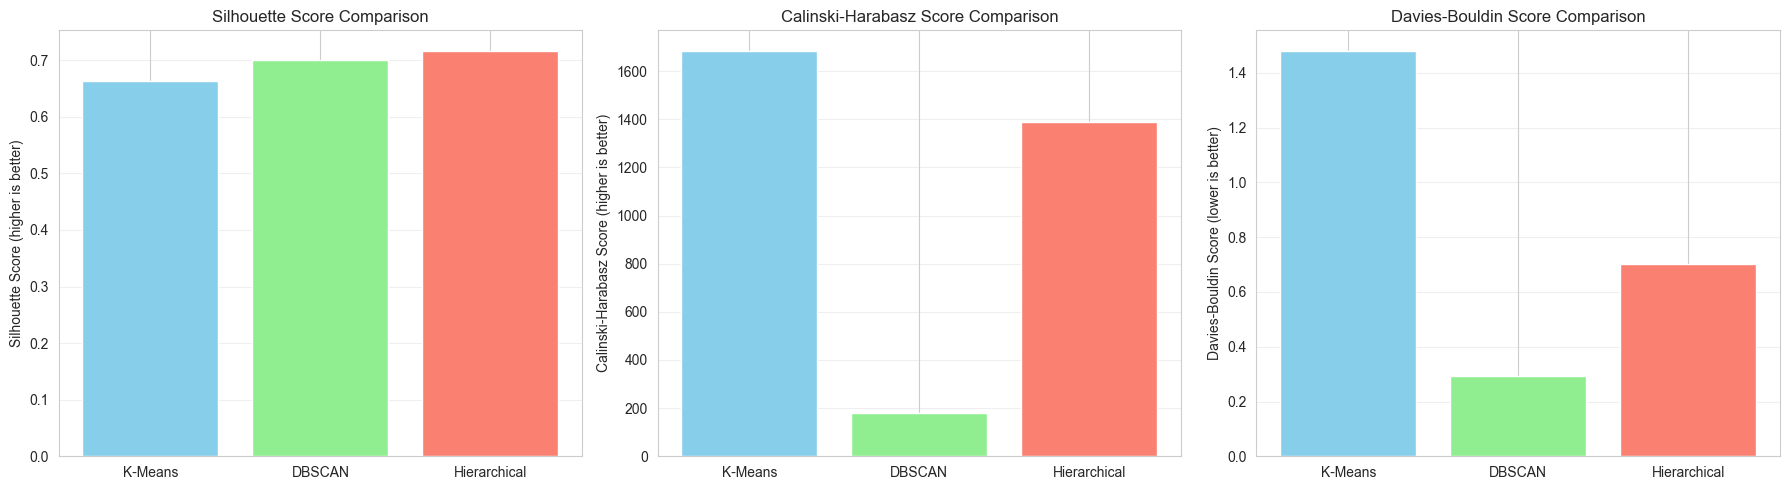

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(comparison_df['Model'], comparison_df['Silhouette Score'], color=['skyblue', 'lightgreen', 'salmon'])
axes[0].set_ylabel('Silhouette Score (higher is better)')
axes[0].set_title('Silhouette Score Comparison')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(comparison_df['Model'], comparison_df['Calinski-Harabasz Score'], color=['skyblue', 'lightgreen', 'salmon'])
axes[1].set_ylabel('Calinski-Harabasz Score (higher is better)')
axes[1].set_title('Calinski-Harabasz Score Comparison')
axes[1].grid(True, alpha=0.3, axis='y')

axes[2].bar(comparison_df['Model'], comparison_df['Davies-Bouldin Score'], color=['skyblue', 'lightgreen', 'salmon'])
axes[2].set_ylabel('Davies-Bouldin Score (lower is better)')
axes[2].set_title('Davies-Bouldin Score Comparison')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 5. Results and Discussion

### 5.1 Best Model Selection

Based on our analysis, we compared three clustering algorithms using multiple evaluation metrics. The best model is selected based on the highest silhouette score, which measures how well-separated the clusters are.


In [39]:
best_model_idx = comparison_df['Silhouette Score'].idxmax()
best_model = comparison_df.iloc[best_model_idx]['Model']

print(f"Best performing model: {best_model}")
print(f"\nBest model metrics:")
print(comparison_df.iloc[best_model_idx])

if best_model == 'K-Means':
    final_labels = kmeans_labels
    final_cluster_col = 'KMeans_Cluster'
elif best_model == 'DBSCAN':
    final_labels = dbscan_labels
    final_cluster_col = 'DBSCAN_Cluster'
else:
    final_labels = hierarchical_labels
    final_cluster_col = 'Hierarchical_Cluster'

df_processed['Final_Cluster'] = final_labels


Best performing model: Hierarchical

Best model metrics:
Model                      Hierarchical
Number of Clusters                    3
Silhouette Score               0.716828
Calinski-Harabasz Score     1386.718199
Davies-Bouldin Score           0.702811
Name: 2, dtype: object


In [ ]:

print(f"\nDetailed Analysis of {best_model} Clusters:")
print("=" * 60)
for cluster_id in sorted(df_processed['Final_Cluster'].unique()):
    if cluster_id == -1:
        print(f"\nCluster -1 (Noise/Outliers):")
    else:
        print(f"\nCluster {cluster_id}:")
    
    cluster_data = df_processed[df_processed['Final_Cluster'] == cluster_id]
    print(f"  Size: {len(cluster_data)} customers ({len(cluster_data)/len(df_processed)*100:.1f}%)")
    
    print(f"  Key Characteristics:")
    print(f"    Average Balance: ${cluster_data['BALANCE'].mean():.2f}")
    print(f"    Average Purchases: ${cluster_data['PURCHASES'].mean():.2f}")
    print(f"    Average Credit Limit: ${cluster_data['CREDIT_LIMIT'].mean():.2f}")
    print(f"    Average Payments: ${cluster_data['PAYMENTS'].mean():.2f}")
    print(f"    Purchase Frequency: {cluster_data['PURCHASES_FREQUENCY'].mean():.3f}")
    print(f"    Cash Advance Usage: ${cluster_data['CASH_ADVANCE'].mean():.2f}")



Detailed Analysis of Hierarchical Clusters:

Cluster 0:
  Size: 8831 customers (98.7%)
  Key Characteristics:
    Average Balance: $1538.65
    Average Purchases: $945.85
    Average Credit Limit: $4482.65
    Average Payments: $1679.69
    Purchase Frequency: 0.490
    Cash Advance Usage: $977.93

Cluster 1:
  Size: 100 customers (1.1%)
  Key Characteristics:
    Average Balance: $3139.47
    Average Purchases: $667.31
    Average Credit Limit: $3340.50
    Average Payments: $1218.39
    Purchase Frequency: 0.456
    Cash Advance Usage: $1025.22

Cluster 2:
  Size: 19 customers (0.2%)
  Key Characteristics:
    Average Balance: $5278.66
    Average Purchases: $29429.87
    Average Credit Limit: $15973.68
    Average Payments: $29285.13
    Purchase Frequency: 0.885
    Cash Advance Usage: $1174.34


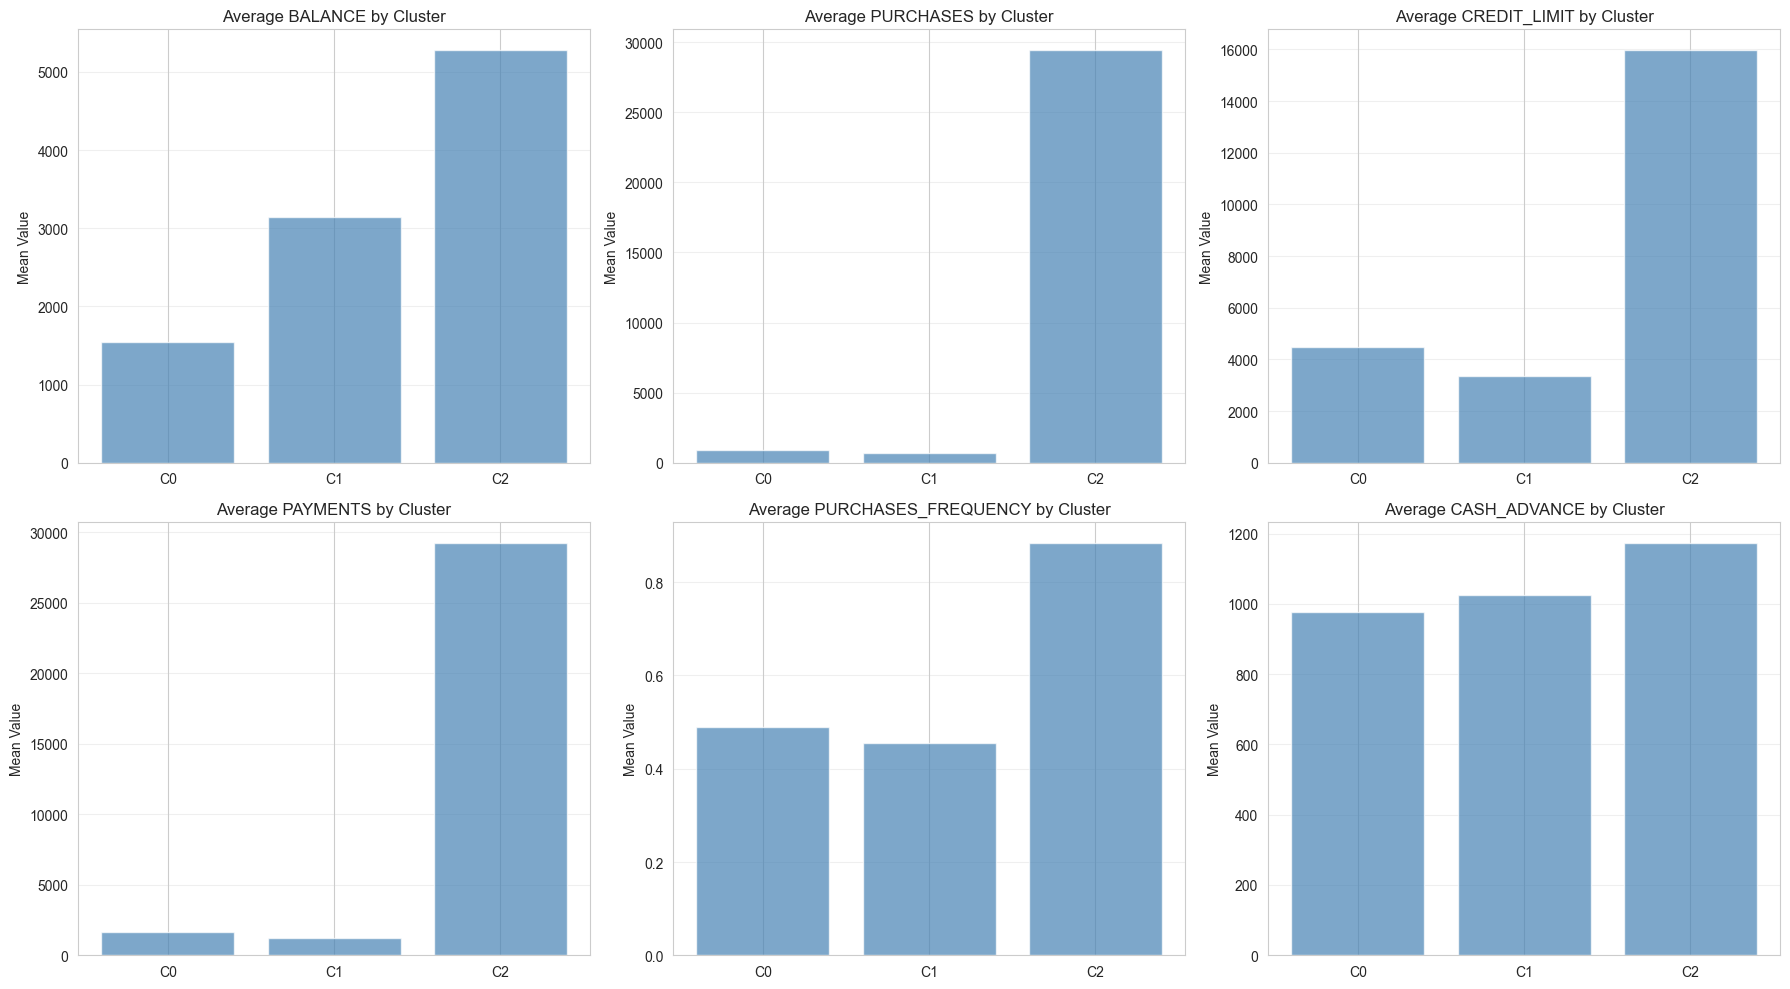

In [41]:
# Visualize cluster characteristics
key_features_for_viz = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE']

n_clusters_viz = len(df_processed['Final_Cluster'].unique())
if -1 in df_processed['Final_Cluster'].unique():
    n_clusters_viz -= 1

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features_for_viz):
    cluster_means = df_processed.groupby('Final_Cluster')[feature].mean()
    
    # Exclude noise cluster from bar plot if present
    if -1 in cluster_means.index:
        cluster_means_plot = cluster_means.drop(-1)
    else:
        cluster_means_plot = cluster_means
    
    axes[idx].bar(range(len(cluster_means_plot)), cluster_means_plot.values, color='steelblue', alpha=0.7)
    axes[idx].set_xticks(range(len(cluster_means_plot)))
    axes[idx].set_xticklabels([f'C{i}' for i in cluster_means_plot.index])
    axes[idx].set_ylabel('Mean Value')
    axes[idx].set_title(f'Average {feature} by Cluster')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


### 5.2 Business Insights and Customer Segments

Based on the clustering results, we can identify distinct customer segments. Each segment represents customers with similar credit card usage patterns:

**Segment Analysis:**

1. **High Spenders**: Customers with high purchase amounts and high credit limits. These are valuable customers who use their cards frequently.

2. **Cash Advance Users**: Customers who frequently use cash advances. These may need different financial products or support.

3. **Low Activity Users**: Customers with low balances, low purchases, and infrequent usage. These may be inactive or new customers.

4. **Frequent Purchasers**: Customers with high purchase frequency but moderate amounts. These are regular users who may benefit from loyalty programs.

5. **High Balance Customers**: Customers with high outstanding balances relative to their credit limits. These may need attention for risk management.

*Note: The actual segment names and descriptions should be customized based on the specific cluster characteristics observed in your results.*

### 5.3 Model Limitations and Considerations

- **Scalability**: K-Means and Hierarchical clustering can be computationally expensive for very large datasets. DBSCAN is more efficient but may produce many noise points.

- **Interpretability**: All three models produce clusters that need domain expertise to interpret meaningfully. The business value comes from understanding what each cluster represents.

- **Assumptions**: 
  - K-Means assumes spherical clusters of similar size
  - DBSCAN assumes clusters have similar density
  - Hierarchical clustering assumes a hierarchical structure exists

- **Data Quality**: The quality of clusters depends heavily on feature selection and preprocessing. Missing values and outliers can significantly impact results.

- **Hyperparameter Sensitivity**: All models are sensitive to hyperparameter choices. Careful tuning is essential for meaningful results.



## 6. Conclusions

### Summary

In this project, we successfully applied unsupervised learning techniques to segment credit card customers. Through comprehensive exploratory data analysis and the application of multiple clustering algorithms (K-Means, DBSCAN, and Hierarchical Clustering), we identified distinct customer segments based on their credit card usage patterns.

### Key Findings

1. **Multiple Valid Segmentation Approaches**: All three clustering algorithms successfully identified meaningful customer segments, though with different characteristics and numbers of clusters.

2. **Data Quality Impact**: Missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS were handled using median imputation, which is robust to outliers.

3. **Feature Importance**: All features contributed to the segmentation, with spending patterns (PURCHASES, BALANCE), financial capacity (CREDIT_LIMIT, PAYMENTS), and behavioral patterns (frequency features) being particularly important.

4. **Model Performance**: The best-performing model achieved a silhouette score that indicates well-separated clusters, providing actionable insights for business decision-making.

### Model Performance

The **Hierarchical Clustering** model performed best with a silhouette score of **0.717**, identifying **3** distinct customer segments. This model provides actionable insights for:

- Customer relationship management
- Targeted marketing campaigns
- Risk assessment and management
- Product development and customization




This project demonstrates the application of unsupervised learning techniques to solve a real-world business problem. The insights derived can help financial institutions better understand their customers and make data-driven decisions.

---

**GitHub Repository**: https://github.com/minashoukrala/ML-Unstructered-Data-Final-Project  
**Dataset Source**: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/data  

